### Loading the Libraries

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as scipy
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols,logit
import pylab
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,confusion_matrix,classification_report,roc_curve
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan,het_goldfeldquandt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression,ElasticNet,Lasso,Ridge,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,GroupShuffleSplit,LeaveOneOut,StratifiedKFold,StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from sklearn.decomposition import PCA

In [ ]:
# from fancyimpute import MICE as MICE
from statsmodels.imputation.mice import MICE
import impyute
from impyute.imputation.cs import MICE

In [ ]:
! pip install impyute

In [34]:
! pip install lightgbm

  Using cached https://files.pythonhosted.org/packages/c7/0b/a183c06e7778893b2f12bb3e2cdab57f142b4e49cd25cc643047f714e74c/lightgbm-2.3.0-py2.py3-none-win_amd64.whl


In [33]:
! pip install xgboost

  Using cached https://files.pythonhosted.org/packages/5e/49/b95c037b717b4ceadc76b6e164603471225c27052d1611d5a2e832757945/xgboost-0.90-py2.py3-none-win_amd64.whl


### Importing the  DataSet

In [2]:
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)
data = pd.read_csv("OnlineNewsPopularity_Capstone.csv")
data.columns = data.columns.str.replace(" ", "")

### Reading the first 5 and the last 5 rows of the dataset

In [28]:
data.head()

url  timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  average_token_length  num_keywords  data_channel_is_lifestyle  data_channel_is_entertainment  data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  data_channel_is_world  kw_min_min  kw_max_min  kw_avg_min  kw_min_max  kw_max_max  kw_avg_max  kw_min_avg  kw_max_avg  kw_avg_avg  self_reference_min_shares  self_reference_max_shares  self_reference_avg_sharess  weekday_is_monday  weekday_is_tuesday  weekday_is_wednesday  weekday_is_thursday  weekday_is_friday  weekday_is_saturday  weekday_is_sunday  is_weekend    LDA_00    LDA_01    LDA_02    LDA_03    LDA_04  global_subjectivity  global_sentiment_polarity  global_rate_positive_words  global_rate_negative_words  rate_positive_words  rate_negative_words  avg_positive_polarity  min_positive_polarity  \
0  http://mashable.com/2013/01/07/amazon-instant-...      731.0            12.0             219.0         0.663594               1.0                  0.815385        4.0             2.0       1.0         0.0              4.680365           5.0                        0.0                            1.0                  0.0                     0.0                   0.0                    0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0                      496.0                      496.0                  496.000000                1.0                 0.0                   0.0                  0.0                0.0                  0.0                0.0         0.0  0.500331  0.378279  0.040005  0.041263  0.040123             0.521617                   0.092562                    0.045662                    0.013699             0.769231             0.230769               0.378636               0.100000   
1  http://mashable.com/2013/01/07/ap-samsung-spon...      731.0             9.0             255.0         0.604743               1.0                  0.791946        3.0             1.0       1.0         0.0              4.913725           4.0                        0.0                            0.0                  1.0                     0.0                   0.0                    0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0                        0.0                        0.0                    0.000000                1.0                 0.0                   0.0                  0.0                0.0                  0.0                0.0         0.0  0.799756  0.050047  0.050096  0.050101  0.050001             0.341246                   0.148948                    0.043137                    0.015686             0.733333             0.266667               0.286915               0.033333   
2  http://mashable.com/2013/01/07/apple-40-billio...      731.0             9.0             211.0         0.575130               1.0                  0.663866        3.0             1.0       1.0         0.0              4.393365           6.0                        0.0                            0.0                  1.0                     0.0                   0.0                    0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0                      918.0                      918.0                  918.000000                1.0                 0.0                   0.0                  0.0                0.0                  0.0                0.0         0.0  0.217792  0.033334  0.033351  0.033334  0.682188             0.702222                   0.323333                    0.056872                    0.009479             0.857143             0.142857               0.495833               0.100000   
3  http://mashable.com/2013/01/07/astronaut-notre...      731.0             9.0             531.0         0.503788               

In [29]:
data.tail()

url  timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  average_token_length  num_keywords  data_channel_is_lifestyle  data_channel_is_entertainment  data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  data_channel_is_world  kw_min_min  kw_max_min  kw_avg_min  kw_min_max  kw_max_max     kw_avg_max   kw_min_avg   kw_max_avg   kw_avg_avg  self_reference_min_shares  self_reference_max_shares  self_reference_avg_sharess  weekday_is_monday  weekday_is_tuesday  weekday_is_wednesday  weekday_is_thursday  weekday_is_friday  weekday_is_saturday  weekday_is_sunday  is_weekend    LDA_00    LDA_01    LDA_02    LDA_03    LDA_04  global_subjectivity  global_sentiment_polarity  global_rate_positive_words  global_rate_negative_words  rate_positive_words  rate_negative_words  avg_positive_polarity  min_positive_polarity  \
39639  http://mashable.com/2014/12/27/samsung-app-aut...        8.0            11.0             346.0         0.529052               1.0                  0.684783        9.0             7.0       1.0         1.0              4.523121           8.0                        0.0                            0.0                  0.0                     0.0                   1.0                    0.0        -1.0       671.0     173.125     26900.0    843300.0  374962.500000  2514.742857  4004.342857  3031.115764                    11400.0                    48000.0                37033.333333                0.0                 0.0                   1.0                  0.0                0.0                  0.0                0.0         0.0  0.025038  0.025001  0.151701  0.025000  0.773260             0.482679                   0.141964                    0.037572                    0.014451             0.722222             0.277778               0.333791               0.100000   
39640  http://mashable.com/2014/12/27/seth-rogen-jame...        8.0            12.0             328.0         0.696296               1.0                  0.885057        9.0             7.0       3.0        48.0              4.405488           7.0                        0.0                            0.0                  0.0                     1.0                   0.0                    0.0        -1.0       616.0     184.000      6500.0    843300.0  192985.714286  1664.267857  5470.168651  3411.660830                     2100.0                     2100.0                 2100.000000                0.0                 0.0                   1.0                  0.0                0.0                  0.0                0.0         0.0  0.029349  0.028575  0.231866  0.681635  0.028575             0.564374                   0.194249                    0.039634                    0.009146             0.812500             0.187500               0.374825               0.136364   
39641  http://mashable.com/2014/12/27/son-pays-off-mo...        8.0            10.0             442.0         0.516355               1.0                  0.644128       24.0             1.0      12.0         1.0              5.076923           8.0                        0.0                            0.0                  0.0                     0.0                   0.0                    0.0        -1.0       691.0     168.250      6200.0    843300.0  295850.000000  1753.882353  6880.687034  4206.439195                     1400.0                     1400.0                 1400.000000                0.0                 0.0                   1.0                  0.0                0.0                  0.0                0.0         0.0  0.159004  0.025025  0.025207  0.643794  0.146970             0.510296                   0.024609                    0.033937                    0.024887             0.576923             0.423077               0.307273               0.136364   
39642     http://mashable.com/2014/12/27/ukraine-blasts/        8.0             6.0          

### Displaying the information of the DataSet

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                              39644 non-null object
timedelta                        39644 non-null float64
n_tokens_title                   39644 non-null float64
n_tokens_content                 39644 non-null float64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null float64
num_self_hrefs                   39644 non-null float64
num_imgs                         39644 non-null float64
num_videos                       39644 non-null float64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null float64
data_channel_is_lifestyle        39644 non-null float64
data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus              39644 non-null floa

In [31]:
data.shape

(39644, 61)

In [32]:
data.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words',
       'avg_positive

### Describing the Statistics of the Dataset

In [33]:
data.describe()

timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  n_non_stop_unique_tokens     num_hrefs  num_self_hrefs      num_imgs    num_videos  average_token_length  num_keywords  data_channel_is_lifestyle  data_channel_is_entertainment  data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  data_channel_is_world    kw_min_min     kw_max_min    kw_avg_min     kw_min_max     kw_max_max     kw_avg_max    kw_min_avg     kw_max_avg    kw_avg_avg  self_reference_min_shares  self_reference_max_shares  self_reference_avg_sharess  weekday_is_monday  weekday_is_tuesday  weekday_is_wednesday  weekday_is_thursday  weekday_is_friday  weekday_is_saturday  weekday_is_sunday    is_weekend        LDA_00        LDA_01        LDA_02        LDA_03        LDA_04  global_subjectivity  global_sentiment_polarity  global_rate_positive_words  global_rate_negative_words  rate_positive_words  rate_negative_words  avg_positive_polarity  min_positive_polarity  \
count  39644.000000    39644.000000      39644.000000     39644.000000      39644.000000              39644.000000  39644.000000    39644.000000  39644.000000  39644.000000          39644.000000  39644.000000               39644.000000                   39644.000000         39644.000000            39644.000000          39644.000000           39644.000000  39644.000000   39644.000000  39644.000000   39644.000000   39644.000000   39644.000000  39644.000000   39644.000000  39644.000000               39644.000000               39644.000000                39644.000000       39644.000000        39644.000000          39644.000000         39644.000000       39644.000000         39644.000000       39644.000000  39644.000000  39644.000000  39644.000000  39644.000000  39644.000000  39644.000000         39644.000000               39644.000000                39644.000000                39644.000000         39644.000000         39644.000000           39644.000000           39644.000000   
mean     354.530471       10.398749        546.514731         0.548216          0.996469                  0.689175     10.883690        3.293638      4.544143      1.249874              4.548239      7.223767                   0.052946                       0.178009             0.157855                0.058597              0.185299               0.212567     26.106801    1153.951682    312.366967   13612.354102  752324.066694  259281.938083   1117.146610    5657.211151   3135.858639                3998.755396               10329.212662                 6401.697580           0.168020            0.186409              0.187544             0.183306           0.143805             0.061876           0.069039      0.130915      0.184599      0.141256      0.216321      0.223770      0.234029             0.443370                   0.119309                    0.039625                    0.016612             0.682150             0.287934               0.353825               0.095446   
std      214.163767        2.114037        471.107508         3.520708          5.231231                  3.264816     11.332017        3.855141      8.309434      4.107855              0.844406      1.909130                   0.223929                       0.382525             0.364610                0.234871              0.388545               0.409129     69.633215    3857.990877    620.783887   57986.029357  214502.129573  135102.247285   1137.456951    6098.871957   1318.150397               19738.670516               41027.576613                24211.332231           0.373889            0.389441              0.390353             0.386922           0.350896             0.240933           0.253524      0.337312      0.262975      0.219707      0.282145      0.295191      0.289183             0.116685                   0.096931                    0.017429                    0.010828             0.190206             0.156156               0.104542               0.071315   
min        8.000000        2.000000          0.000

### Checking Null Values in the DataSet

In [34]:
data.isnull().sum().sum()

0

### Quartiles and Inter Quartile Range

In [35]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

timedelta                        3.780000e+02
n_tokens_title                   3.000000e+00
n_tokens_content                 4.700000e+02
n_unique_tokens                  1.378252e-01
n_non_stop_words                 4.314000e-09
n_non_stop_unique_tokens         1.288902e-01
num_hrefs                        1.000000e+01
num_self_hrefs                   3.000000e+00
num_imgs                         3.000000e+00
num_videos                       1.000000e+00
average_token_length             3.764347e-01
num_keywords                     3.000000e+00
data_channel_is_lifestyle        0.000000e+00
data_channel_is_entertainment    0.000000e+00
data_channel_is_bus              0.000000e+00
data_channel_is_socmed           0.000000e+00
data_channel_is_tech             0.000000e+00
data_channel_is_world            0.000000e+00
kw_min_min                       5.000000e+00
kw_max_min                       5.550000e+02
kw_avg_min                       2.152500e+02
kw_min_max                       7

### Converting Outliers to Null Values

In [36]:
new_data = data.copy()

In [37]:
new_data.shape

(39644, 61)

In [38]:
new_data.drop([],inplace=True,axis=1)

In [39]:
column = new_data.columns

In [40]:
new_data.drop(["url",'timedelta','data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world','weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words',
       'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity', 'shares'],inplace=True,axis=1)

In [41]:
def out_null(column):
        IQR=column.quantile(0.75)-column.quantile(0.25)
        UL=column.quantile(0.75)+1.5*IQR
        LL=column.quantile(0.25)-1.5*IQR
        column.where(column.between(LL,UL),np.nan,inplace=True)

In [42]:
for i in new_data.columns:
    out_null(new_data[i])

In [43]:
new_data.isnull().sum()

n_tokens_title                 156
n_tokens_content              1933
n_unique_tokens               1604
n_non_stop_words              2827
n_non_stop_unique_tokens      1733
num_hrefs                     2169
num_self_hrefs                2090
num_imgs                      7703
num_videos                    2946
average_token_length          1681
num_keywords                    51
kw_min_min                    4677
kw_max_min                    3661
kw_avg_min                    2081
kw_min_max                    5063
kw_max_max                    9440
kw_avg_max                     960
kw_min_avg                       0
kw_max_avg                    2391
kw_avg_avg                    1629
self_reference_min_shares     4976
self_reference_max_shares     4183
self_reference_avg_sharess    4209
dtype: int64

In [44]:
new_data.head(15)

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  average_token_length  num_keywords  kw_min_min  kw_max_min  kw_avg_min  kw_min_max  kw_max_max  kw_avg_max  kw_min_avg  kw_max_avg  kw_avg_avg  self_reference_min_shares  self_reference_max_shares  self_reference_avg_sharess
0             12.0             219.0         0.663594               1.0                  0.815385        4.0             2.0       1.0         0.0              4.680365           5.0         0.0         0.0         0.0         0.0         NaN         0.0         0.0         0.0         NaN                      496.0                      496.0                  496.000000
1              9.0             255.0         0.604743               1.0                  0.791946        3.0             1.0       1.0         0.0              4.913725           4.0         0.0         0.0         0.0         0.0         NaN         0.0         0.0         0.0         NaN                        0.0                        0.0                    0.000000
2              9.0             211.0         0.575130               1.0                  0.663866        3.0             1.0       1.0         0.0              4.393365           6.0         0.0         0.0         0.0         0.0         NaN         0.0         0.0         0.0         NaN                      918.0                      918.0                  918.000000
3              9.0             531.0         0.503788               1.0                  0.665635        9.0             0.0       1.0         0.0              4.404896           7.0         0.0         0.0         0.0         0.0         NaN         0.0         0.0         0.0         NaN                        0.0                        0.0                    0.000000
4             13.0            1072.0         0.415646               1.0                  0.540890       19.0             NaN       NaN         0.0              4.682836           7.0         0.0         0.0         0.0         0.0         NaN         0.0         0.0         0.0         NaN                      545.0                    16000.0                 3151.157895
5             10.0             370.0         0.559889               1.0                  0.698198        2.0             2.0       0.0         0.0              4.359459           9.0         0.0         0.0         0.0         0.0         NaN         0.0         0.0         0.0         NaN                        NaN                     8500.0                 8500.000000
6              8.0             960.0         0.418163               1.0                  0.549834       21.0             NaN       NaN         0.0              4.654167          10.0         0.0         0.0         0.0         0.0         NaN         0.0         0.0         0.0         NaN                      545.0                    16000.0                 3151.157895
7             12.0             989.0         0.433574               1.0                  0.572108       20.0             NaN       NaN         0.0              4.617796           9.0         0.0         0.0         0.0         0.0         NaN         0.0         0.0         0.0         NaN                      545.0                    16000.0                 3151.157895
8             11.0              97.0         0.670103               NaN                  0.836735        2.0             0.0       0.0         0.0              4.855670           7.0         0.0         0.0         0.0         0.0         NaN         0.0         0.0         0.0         NaN                        0.0                        0.0                    0.000000
9             10.0             231.0         0.636364               1.0                  0.797101        4.0             1.0       1.0         1.0              5.090909           5.0         0.0         0.0         0.0         0.0         NaN         0.0         0.0        

In [45]:
data.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words',
       'avg_positive

In [46]:
data.drop(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords','kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess',],axis=1,inplace=True)

### Percentage of Null Values in the whole dataset and in each column and in each row

In [47]:
# Percentage of Null Values in the whole dataset
(new_data.isnull().sum().sum()/2418284)*100

2.818651572768128

In [48]:
# Percentage of Null Values in each column
(new_data.isnull().sum()/len(new_data))*100

n_tokens_title                 0.393502
n_tokens_content               4.875895
n_unique_tokens                4.046009
n_non_stop_words               7.130966
n_non_stop_unique_tokens       4.371406
num_hrefs                      5.471194
num_self_hrefs                 5.271920
num_imgs                      19.430431
num_videos                     7.431137
average_token_length           4.240238
num_keywords                   0.128645
kw_min_min                    11.797498
kw_max_min                     9.234689
kw_avg_min                     5.249218
kw_min_max                    12.771163
kw_max_max                    23.811926
kw_avg_max                     2.421552
kw_min_avg                     0.000000
kw_max_avg                     6.031177
kw_avg_avg                     4.109071
self_reference_min_shares     12.551710
self_reference_max_shares     10.551408
self_reference_avg_sharess    10.616991
dtype: float64

In [49]:
# Percentage of Null Values in each row
(new_data.isnull().sum(axis=1)/len(new_data))

0        0.000050
1        0.000050
2        0.000050
3        0.000050
4        0.000101
5        0.000076
6        0.000101
7        0.000101
8        0.000076
9        0.000050
10       0.000050
11       0.000050
12       0.000126
13       0.000126
14       0.000076
15       0.000050
16       0.000101
17       0.000076
18       0.000076
19       0.000101
20       0.000101
21       0.000050
22       0.000101
23       0.000101
24       0.000050
25       0.000050
26       0.000050
27       0.000101
28       0.000050
29       0.000050
           ...   
39614    0.000000
39615    0.000126
39616    0.000101
39617    0.000025
39618    0.000025
39619    0.000000
39620    0.000000
39621    0.000101
39622    0.000000
39623    0.000000
39624    0.000000
39625    0.000025
39626    0.000050
39627    0.000000
39628    0.000000
39629    0.000050
39630    0.000000
39631    0.000025
39632    0.000000
39633    0.000000
39634    0.000050
39635    0.000025
39636    0.000076
39637    0.000050
39638    0

### Multiple Imputation by Chained Equations (MICE) for Outlier Treatment

In [50]:
imputed_data = mice(new_data)

C:\Users\Toshiba\Anaconda3\lib\site-packages\impyute\util\preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


In [51]:
imputed_data.columns

RangeIndex(start=0, stop=23, step=1)

In [52]:
imputed_data.columns = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess']

In [53]:
imputed_data.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess'], dtype='object')

In [54]:
imputed_data.to_csv("Mice_DF.csv",index=False)

### Joined Data

In [56]:
df = data.join(imputed_data)
df.head()

url  timedelta  data_channel_is_lifestyle  data_channel_is_entertainment  data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  data_channel_is_world  weekday_is_monday  weekday_is_tuesday  weekday_is_wednesday  weekday_is_thursday  weekday_is_friday  weekday_is_saturday  weekday_is_sunday  is_weekend    LDA_00    LDA_01    LDA_02    LDA_03    LDA_04  global_subjectivity  global_sentiment_polarity  global_rate_positive_words  global_rate_negative_words  rate_positive_words  rate_negative_words  avg_positive_polarity  min_positive_polarity  max_positive_polarity  avg_negative_polarity  min_negative_polarity  max_negative_polarity  title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  abs_title_sentiment_polarity  shares  n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  average_token_length  num_keywords  \
0  http://mashable.com/2013/01/07/amazon-instant-...      731.0                        0.0                            1.0                  0.0                     0.0                   0.0                    0.0                1.0                 0.0                   0.0                  0.0                0.0                  0.0                0.0         0.0  0.500331  0.378279  0.040005  0.041263  0.040123             0.521617                   0.092562                    0.045662                    0.013699             0.769231             0.230769               0.378636               0.100000                    0.7              -0.350000                 -0.600              -0.200000            0.500000                 -0.187500                0.000000                      0.187500     593            12.0             219.0         0.663594               1.0                  0.815385        4.0        2.000000   1.00000         0.0              4.680365           5.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...      731.0                        0.0                            0.0                  1.0                     0.0                   0.0                    0.0                1.0                 0.0                   0.0                  0.0                0.0                  0.0                0.0         0.0  0.799756  0.050047  0.050096  0.050101  0.050001             0.341246                   0.148948                    0.043137                    0.015686             0.733333             0.266667               0.286915               0.033333                    0.7              -0.118750                 -0.125              -0.100000            0.000000                  0.000000                0.500000                      0.000000     711             9.0             255.0         0.604743               1.0                  0.791946        3.0        1.000000   1.00000         0.0              4.913725           4.0   
2  http://mashable.com/2013/01/07/apple-40-billio...      731.0                        0.0                            0.0                  1.0                     0.0                   0.0                    0.0                1.0                 0.0                   0.0                  0.0                0.0                  0.0                0.0         0.0  0.217792  0.033334  0.033351  0.033334  0.682188             0.702222                   0.323333                    0.056872                    0.009479             0.857143             0.142857               0.495833               0.100000                    1.0              -0.466667                 -0.800              -0.133333            0.000000                  0.000000                0.500000                      0.000000    1500             9.0             211.0         0.575130               1.0                  0.663866        3.0        1.000000   1.00000         0.0              4.393365           6.0   
3  http://mashable.com/2013/01/07/astronaut-notre...      731.0                        0.

In [57]:
df.shape

(39644, 61)

In [58]:
df.isnull().sum().sum()

0

In [59]:
df.to_csv("Full_DF_With_Mice.csv",index=False)

In [3]:
df = pd.read_csv("Full_DF_With_Mice.csv")

### Exploratory Data Analysis

#### Univariate Analysis

For Numerical Columns - We create Histogram (Distplot | Seaborn)

For Categorical Columns - Barplot | Countplot

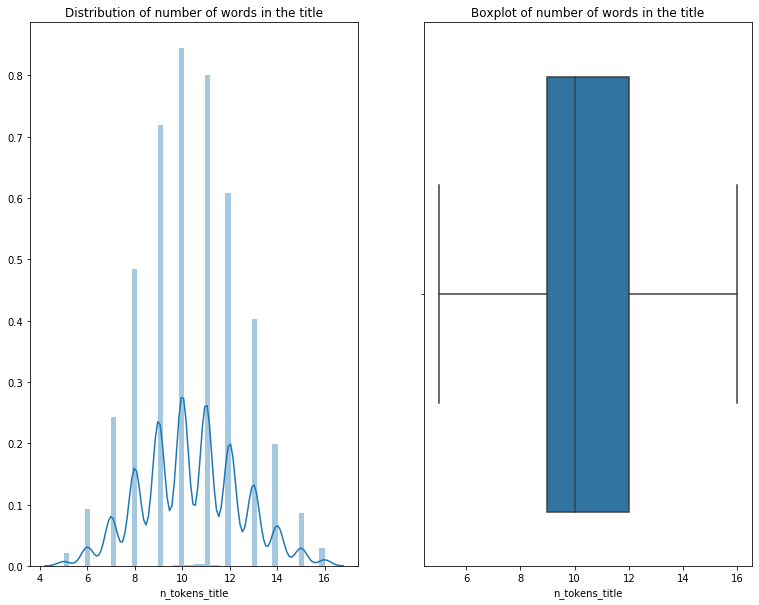

In [60]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.n_tokens_title)
plt.title("Distribution of number of words in the title")
plt.subplot(132)
sns.boxplot(df.n_tokens_title)
plt.title("Boxplot of number of words in the title")
plt.show()

In [61]:
LL = data[data<(Q1-1.5*IQR)]
UL = data[data>(Q3+1.5*IQR)]

In [62]:
data.skew()

timedelta                         0.120504
data_channel_is_lifestyle         3.993019
data_channel_is_entertainment     1.683585
data_channel_is_bus               1.876870
data_channel_is_socmed            3.758880
data_channel_is_tech              1.619976
data_channel_is_world             1.405169
weekday_is_monday                 1.775908
weekday_is_tuesday                1.610547
weekday_is_wednesday              1.600971
weekday_is_thursday               1.637070
weekday_is_friday                 2.030305
weekday_is_saturday               3.637086
weekday_is_sunday                 3.399927
is_weekend                        2.188500
LDA_00                            1.567463
LDA_01                            2.086722
LDA_02                            1.311695
LDA_03                            1.238716
LDA_04                            1.173129
global_subjectivity              -1.372689
global_sentiment_polarity         0.105457
global_rate_positive_words        0.323047
global_rate

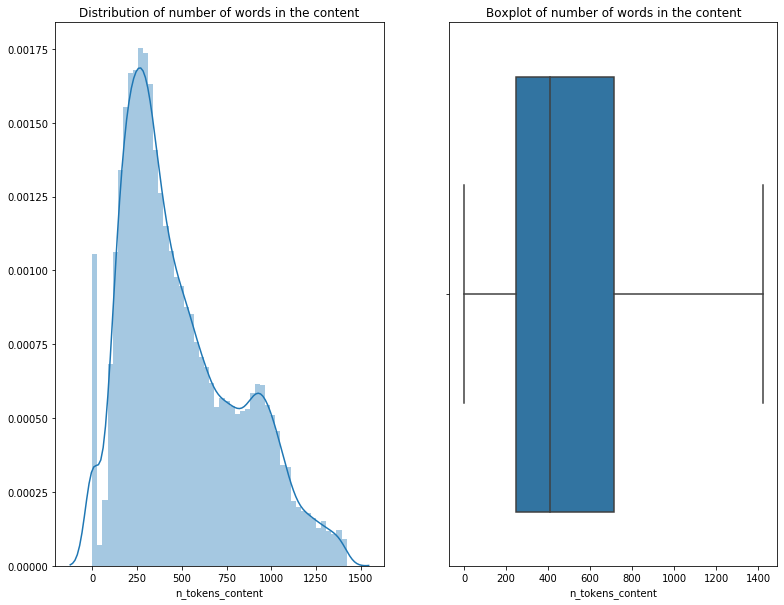

In [63]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.n_tokens_content)
plt.title("Distribution of number of words in the content")
plt.subplot(132)
sns.boxplot(df.n_tokens_content)
plt.title("Boxplot of number of words in the content")
plt.show()

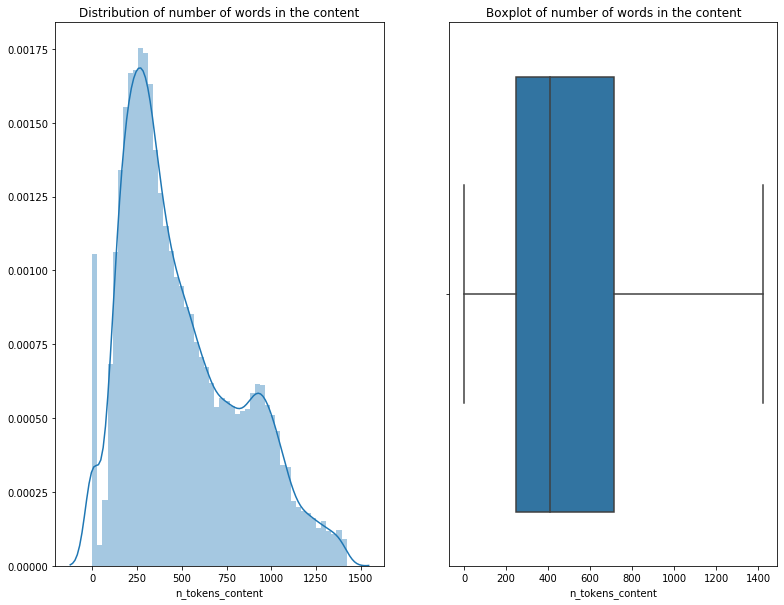

In [64]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.n_tokens_content)
plt.title("Distribution of number of words in the content")
plt.subplot(132)
sns.boxplot(df.n_tokens_content)
plt.title("Boxplot of number of words in the content")
plt.show()

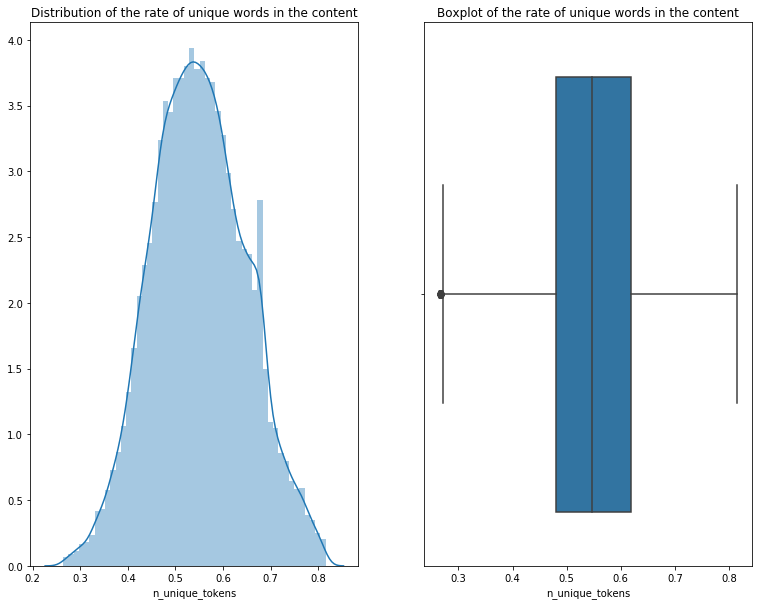

In [65]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.n_unique_tokens)
plt.title("Distribution of the rate of unique words in the content")
plt.subplot(132)
sns.boxplot(df.n_unique_tokens)
plt.title("Boxplot of the rate of unique words in the content")
plt.show()

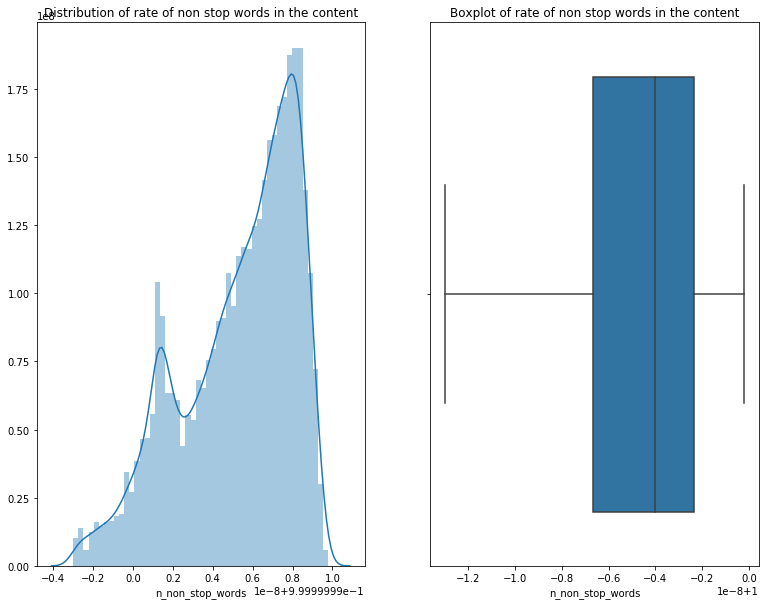

In [66]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.n_non_stop_words)
plt.title("Distribution of rate of non stop words in the content")
plt.subplot(132)
sns.boxplot(df.n_non_stop_words)
plt.title("Boxplot of rate of non stop words in the content")
plt.show()

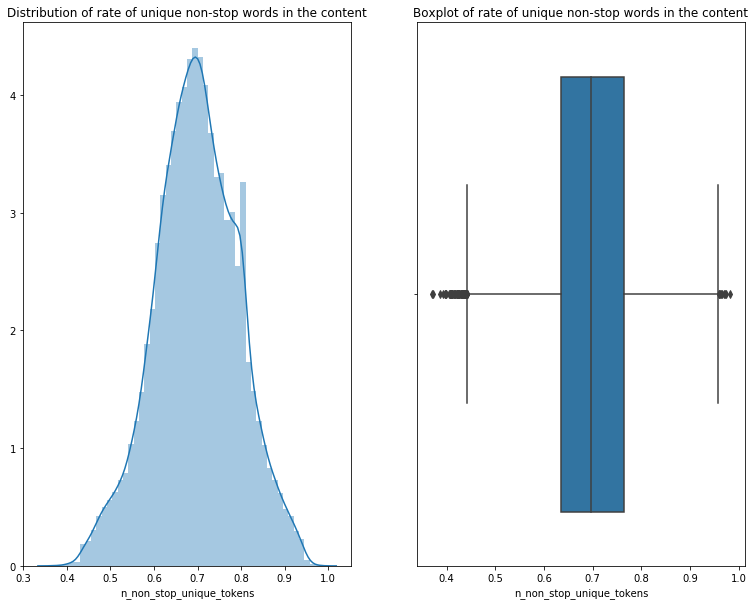

In [67]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.n_non_stop_unique_tokens)
plt.title("Distribution of rate of unique non-stop words in the content")
plt.subplot(132)
sns.boxplot(df.n_non_stop_unique_tokens)
plt.title("Boxplot of rate of unique non-stop words in the content")
plt.show()

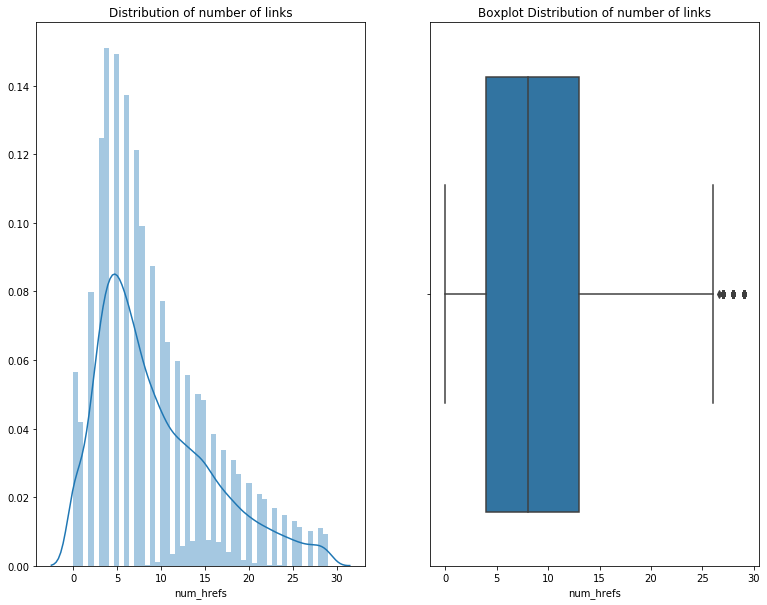

In [68]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.num_hrefs)
plt.title("Distribution of number of links")
plt.subplot(132)
sns.boxplot(df.num_hrefs)
plt.title("Boxplot Distribution of number of links")
plt.show()

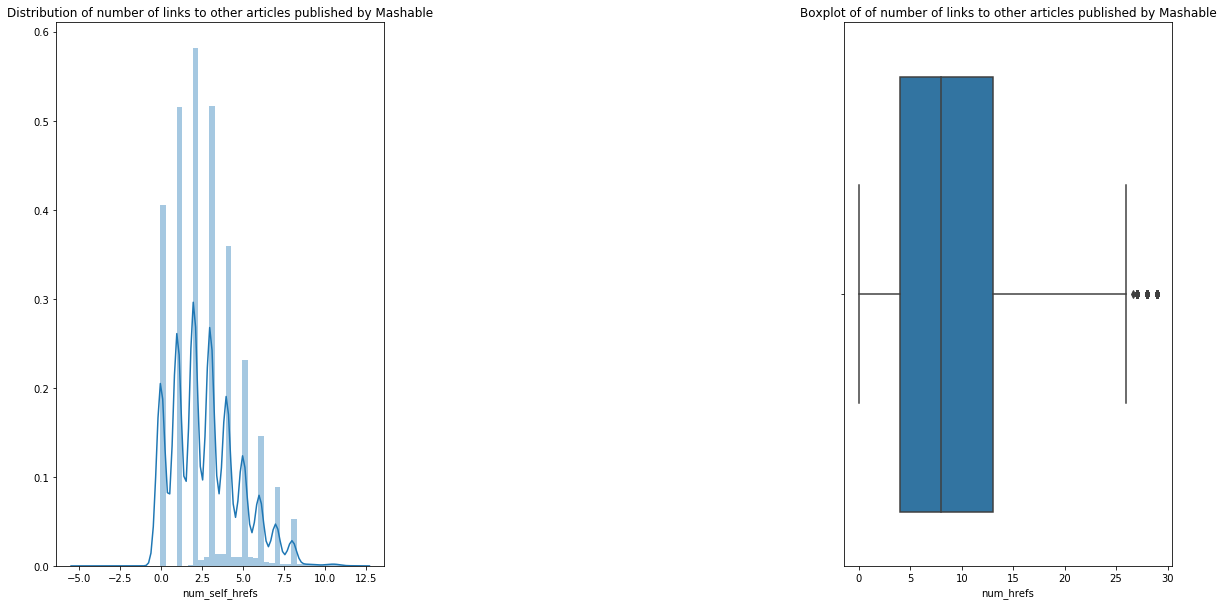

In [69]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.num_self_hrefs)
plt.title("Distribution of number of links to other articles published by Mashable")
plt.subplot(133)
sns.boxplot(df.num_hrefs)
plt.title("Boxplot of of number of links to other articles published by Mashable")
plt.show()

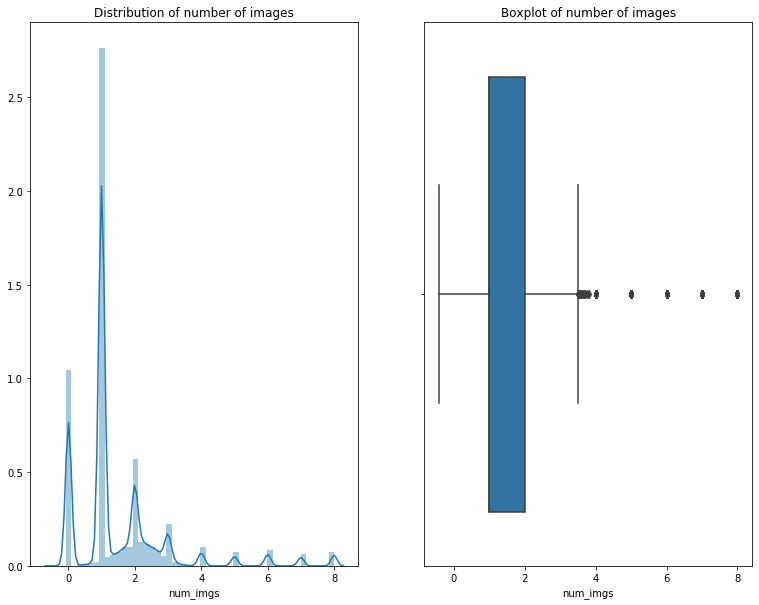

In [70]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.num_imgs)
plt.title("Distribution of number of images")
plt.subplot(132)
sns.boxplot(df.num_imgs)
plt.title("Boxplot of number of images")
plt.show()

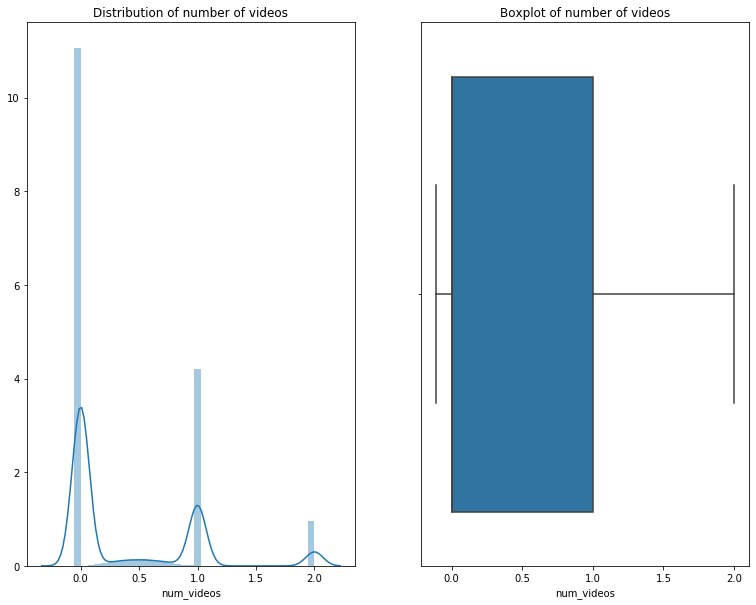

In [71]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.num_videos)
plt.title("Distribution of number of videos")
plt.subplot(132)
sns.boxplot(df.num_videos)
plt.title("Boxplot of number of videos")
plt.show()

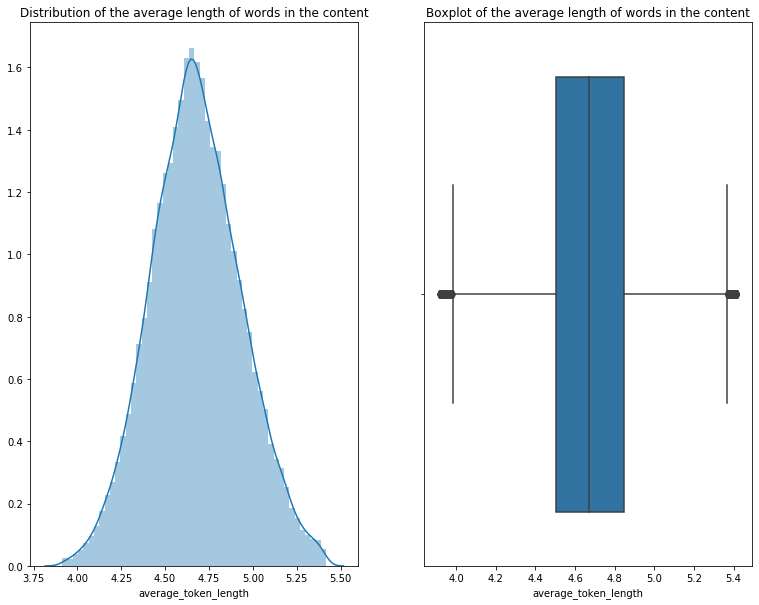

In [72]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.average_token_length)
plt.title("Distribution of the average length of words in the content")
plt.subplot(132)
sns.boxplot(df.average_token_length)
plt.title("Boxplot of the average length of words in the content")
plt.show()

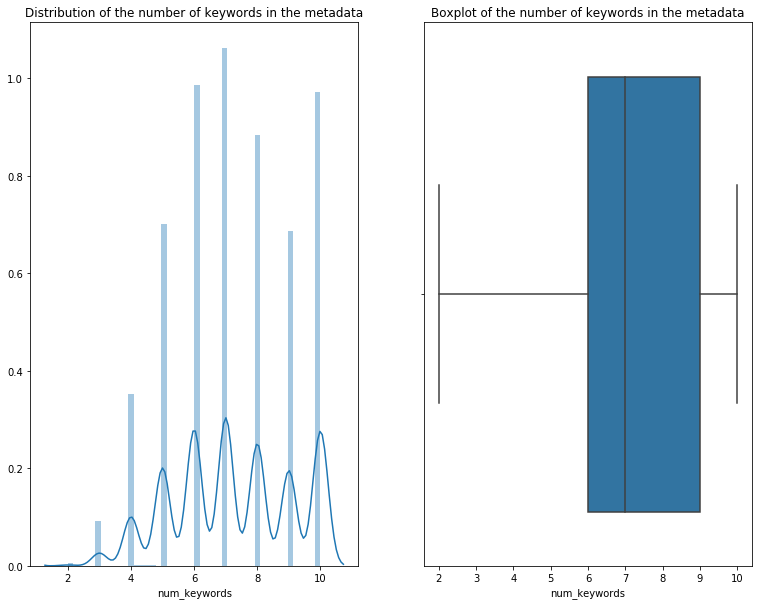

In [73]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.num_keywords)
plt.title("Distribution of the number of keywords in the metadata")
plt.subplot(132)
sns.boxplot(df.num_keywords)
plt.title("Boxplot of the number of keywords in the metadata")
plt.show()

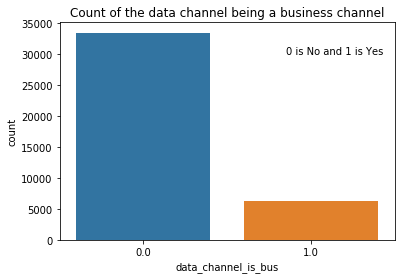

In [74]:
sns.countplot(df.data_channel_is_bus)
plt.title("Count of the data channel being a business channel")
plt.text(.85,30000,"0 is No and 1 is Yes")
plt.show()

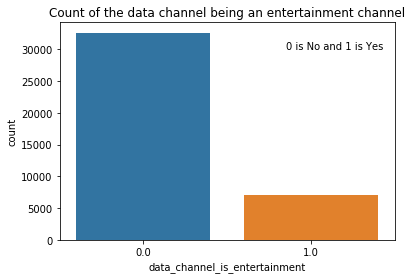

In [75]:
sns.countplot(df.data_channel_is_entertainment)
plt.title("Count of the data channel being an entertainment channel")
plt.text(.85,30000,"0 is No and 1 is Yes")
plt.show()

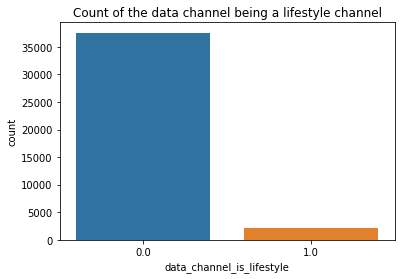

In [76]:
sns.countplot(df.data_channel_is_lifestyle)
plt.title("Count of the data channel being a lifestyle channel")
plt.show()

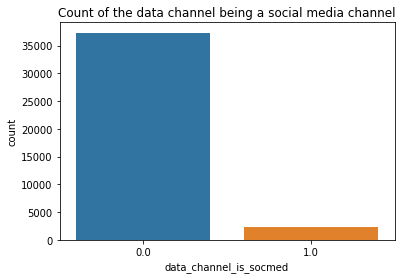

In [77]:
sns.countplot(df.data_channel_is_socmed)
plt.title("Count of the data channel being a social media channel")
plt.show()

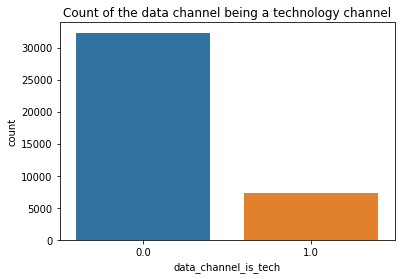

In [78]:
sns.countplot(df.data_channel_is_tech)
plt.title("Count of the data channel being a technology channel")
plt.show()

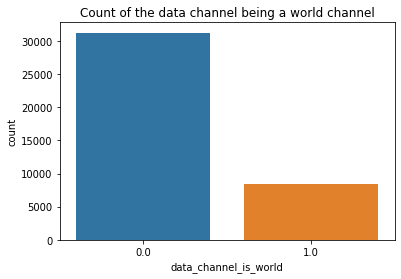

In [79]:
sns.countplot(df.data_channel_is_world)
plt.title("Count of the data channel being a world channel")
plt.show()

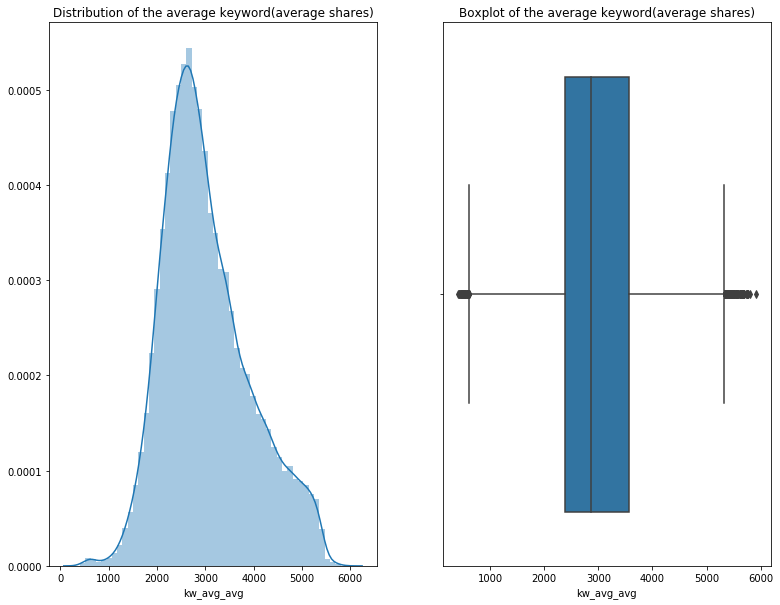

In [80]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.kw_avg_avg)
plt.title("Distribution of the average keyword(average shares)")
plt.subplot(132)
sns.boxplot(df.kw_avg_avg)
plt.title("Boxplot of the average keyword(average shares)")
plt.show()

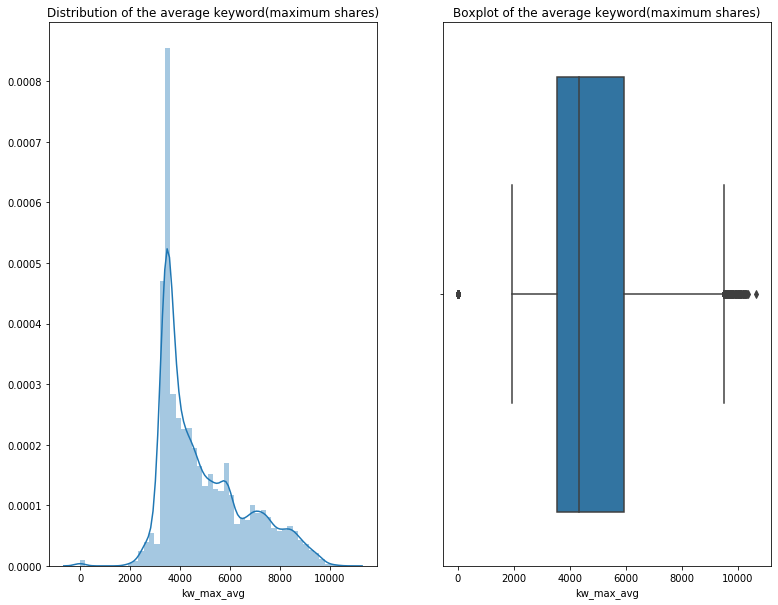

In [81]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.kw_max_avg)
plt.title("Distribution of the average keyword(maximum shares)")
plt.subplot(132)
sns.boxplot(df.kw_max_avg)
plt.title("Boxplot of the average keyword(maximum shares)")
plt.show()

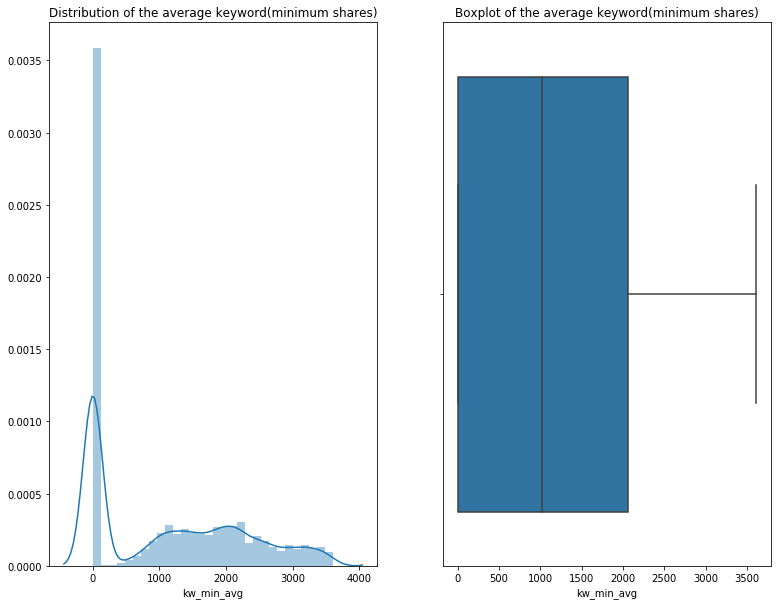

In [82]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.kw_min_avg)
plt.title("Distribution of the average keyword(minimum shares)")
plt.subplot(132)
sns.boxplot(df.kw_min_avg)
plt.title("Boxplot of the average keyword(minimum shares)")
plt.show()

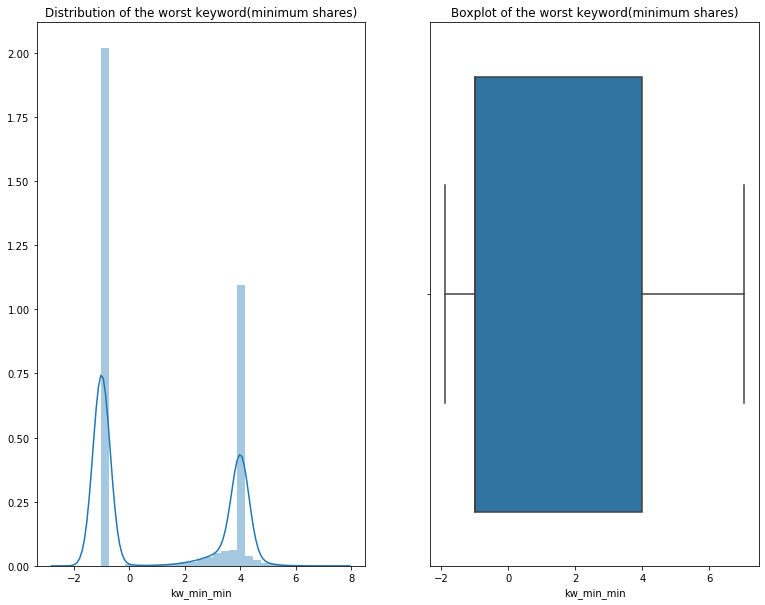

In [83]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.kw_min_min)
plt.title("Distribution of the worst keyword(minimum shares)")
plt.subplot(132)
sns.boxplot(df.kw_min_min)
plt.title("Boxplot of the worst keyword(minimum shares)")
plt.show()

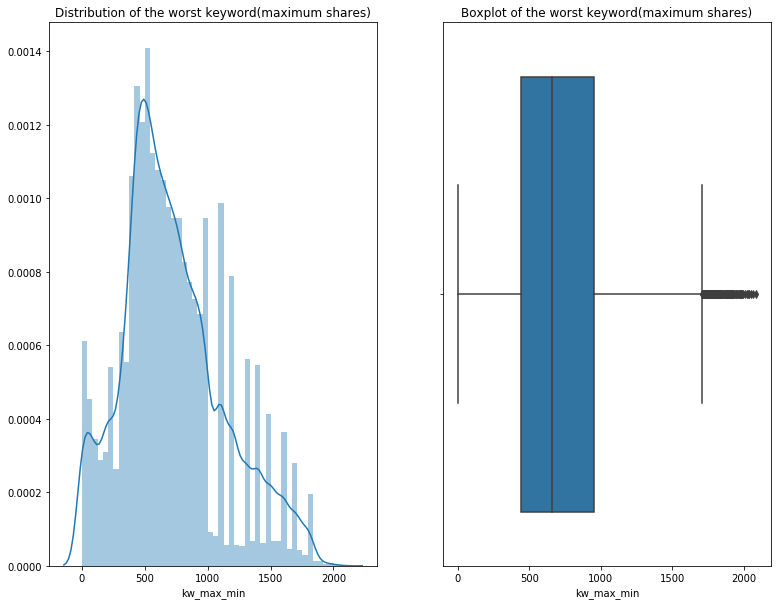

In [84]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.kw_max_min)
plt.title("Distribution of the worst keyword(maximum shares)")
plt.subplot(132)
sns.boxplot(df.kw_max_min)
plt.title("Boxplot of the worst keyword(maximum shares)")
plt.show()

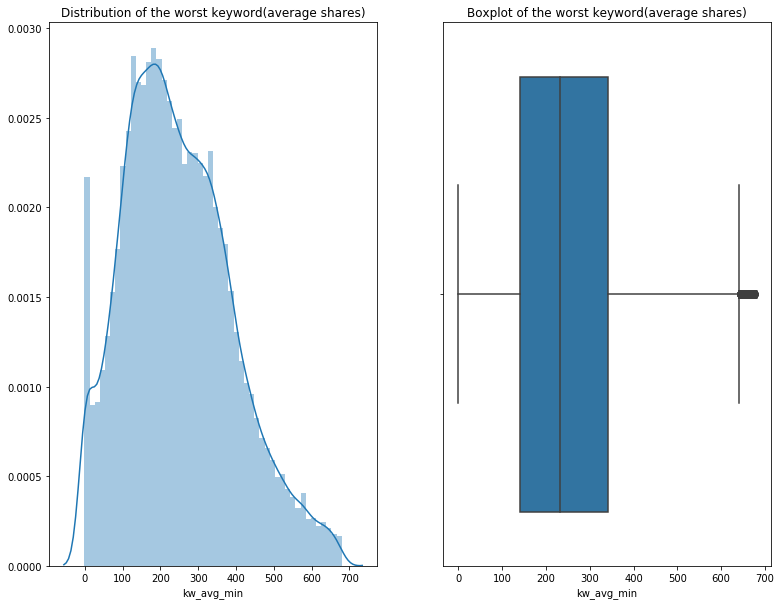

In [85]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.kw_avg_min)
plt.title("Distribution of the worst keyword(average shares)")
plt.subplot(132)
sns.boxplot(df.kw_avg_min)
plt.title("Boxplot of the worst keyword(average shares)")
plt.show()

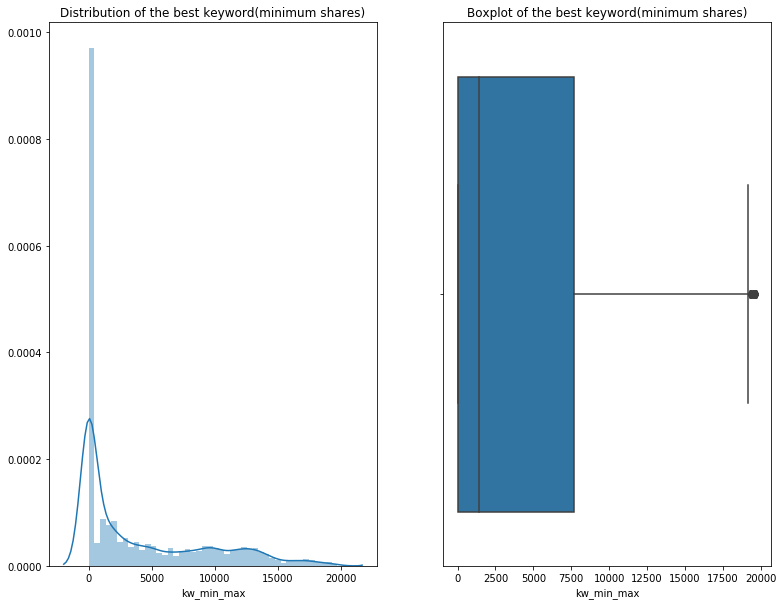

In [86]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.kw_min_max)
plt.title("Distribution of the best keyword(minimum shares)")
plt.subplot(132)
sns.boxplot(df.kw_min_max)
plt.title("Boxplot of the best keyword(minimum shares)")
plt.show()

C:\Users\Toshiba\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Toshiba\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


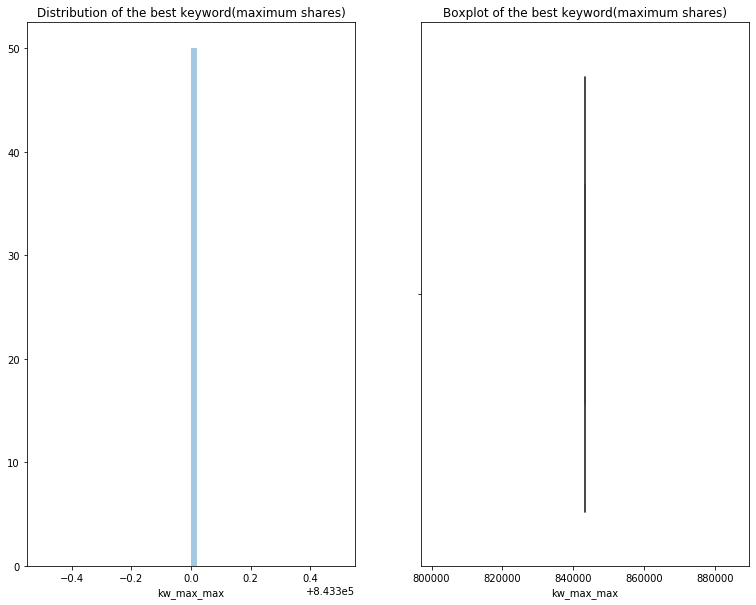

In [87]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.kw_max_max)
plt.title("Distribution of the best keyword(maximum shares)")
plt.subplot(132)
sns.boxplot(df.kw_max_max)
plt.title("Boxplot of the best keyword(maximum shares)")
plt.show()

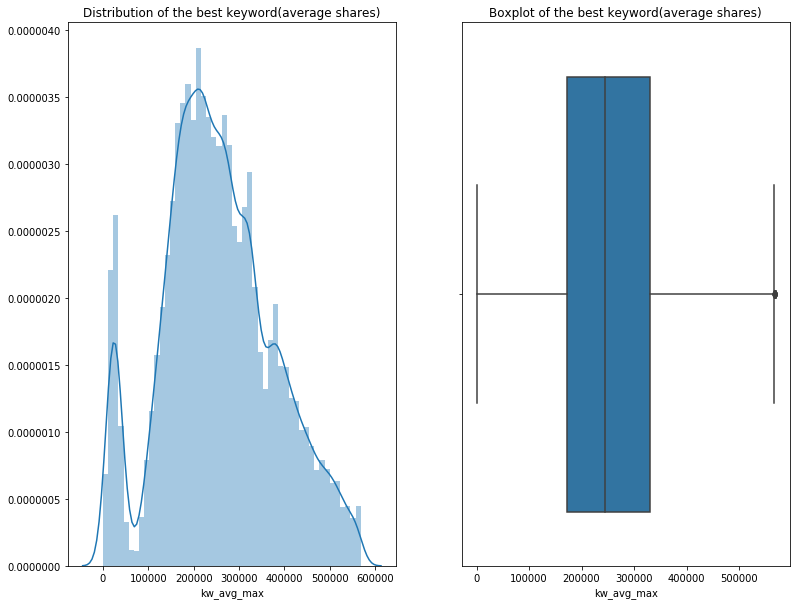

In [88]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.kw_avg_max)
plt.title("Distribution of the best keyword(average shares)")
plt.subplot(132)
sns.boxplot(df.kw_avg_max)
plt.title("Boxplot of the best keyword(average shares)")
plt.show()

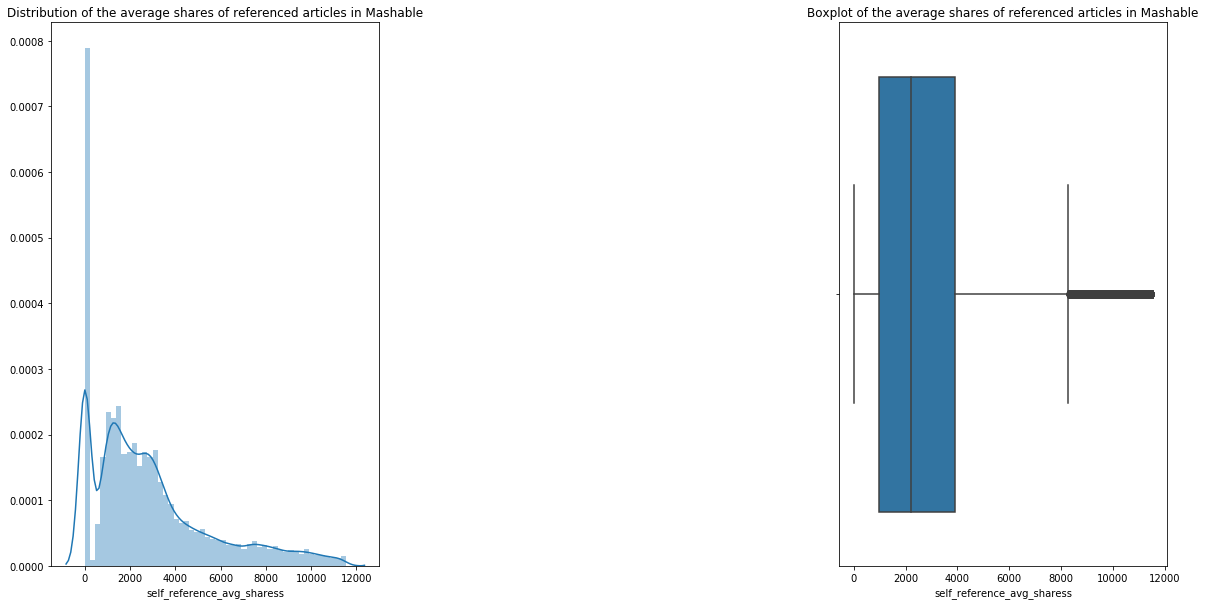

In [89]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.self_reference_avg_sharess)
plt.title("Distribution of the average shares of referenced articles in Mashable")
plt.subplot(133)
sns.boxplot(df.self_reference_avg_sharess)
plt.title("Boxplot of the average shares of referenced articles in Mashable")
plt.show()

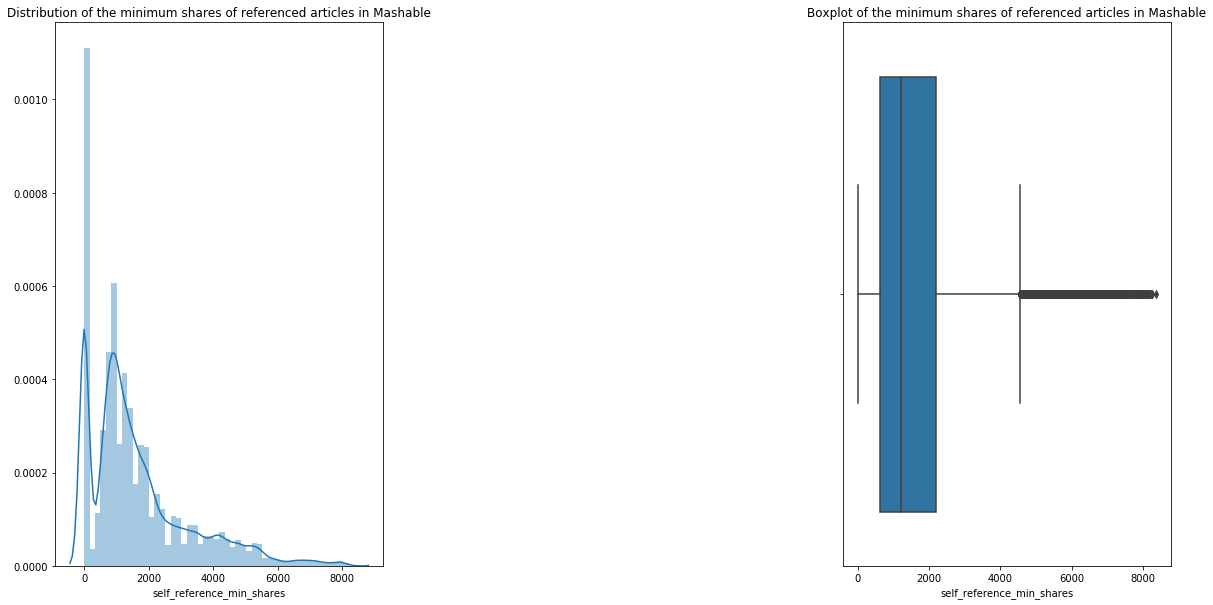

In [90]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.self_reference_min_shares)
plt.title("Distribution of the minimum shares of referenced articles in Mashable")
plt.subplot(133)
sns.boxplot(df.self_reference_min_shares)
plt.title("Boxplot of the minimum shares of referenced articles in Mashable")
plt.show()

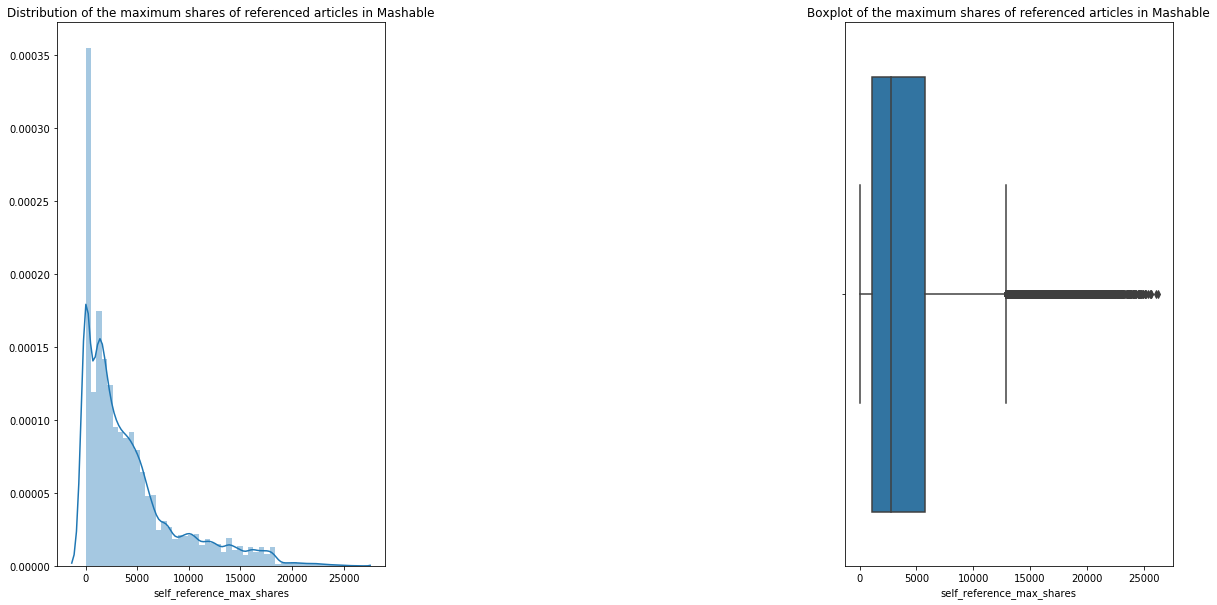

In [91]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.self_reference_max_shares)
plt.title("Distribution of the maximum shares of referenced articles in Mashable")
plt.subplot(133)
sns.boxplot(df.self_reference_max_shares)
plt.title("Boxplot of the maximum shares of referenced articles in Mashable")
plt.show()

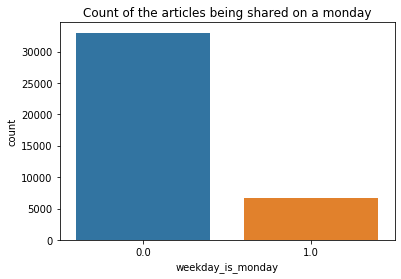

In [92]:
sns.countplot(df.weekday_is_monday)
plt.title("Count of the articles being shared on a monday")
plt.show()

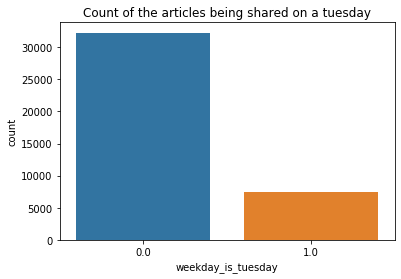

In [93]:
sns.countplot(df.weekday_is_tuesday)
plt.title("Count of the articles being shared on a tuesday")
plt.show()

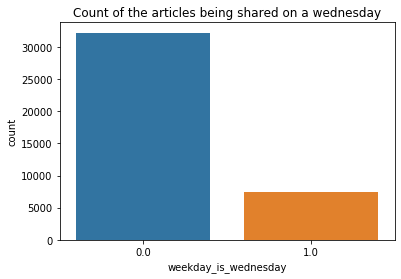

In [94]:
sns.countplot(df.weekday_is_wednesday)
plt.title("Count of the articles being shared on a wednesday")
plt.show()

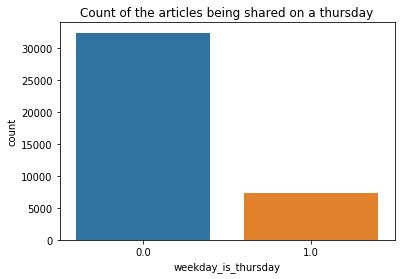

In [95]:
sns.countplot(df.weekday_is_thursday)
plt.title("Count of the articles being shared on a thursday")
plt.show()

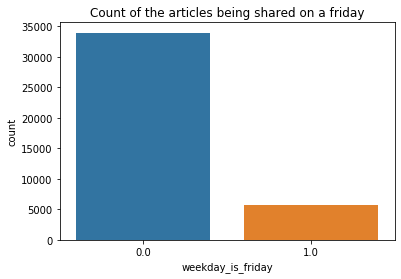

In [96]:
sns.countplot(df.weekday_is_friday)
plt.title("Count of the articles being shared on a friday")
plt.show()

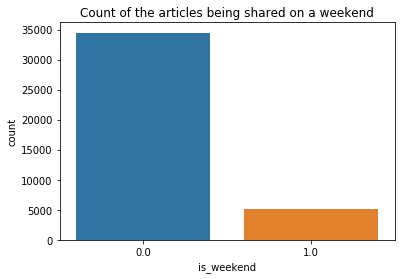

In [97]:
sns.countplot(df.is_weekend)
plt.title("Count of the articles being shared on a weekend")
plt.show()

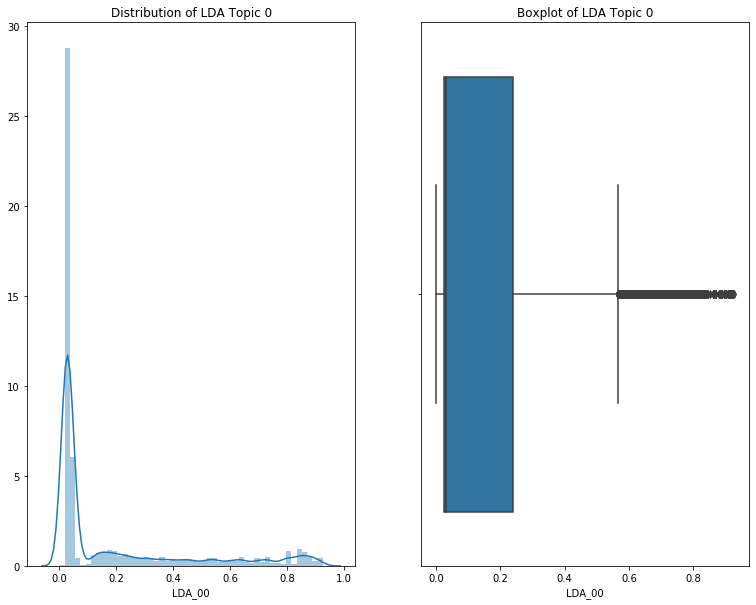

In [98]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.LDA_00)
plt.title("Distribution of LDA Topic 0")
plt.subplot(132)
sns.boxplot(df.LDA_00)
plt.title("Boxplot of LDA Topic 0")
plt.show()

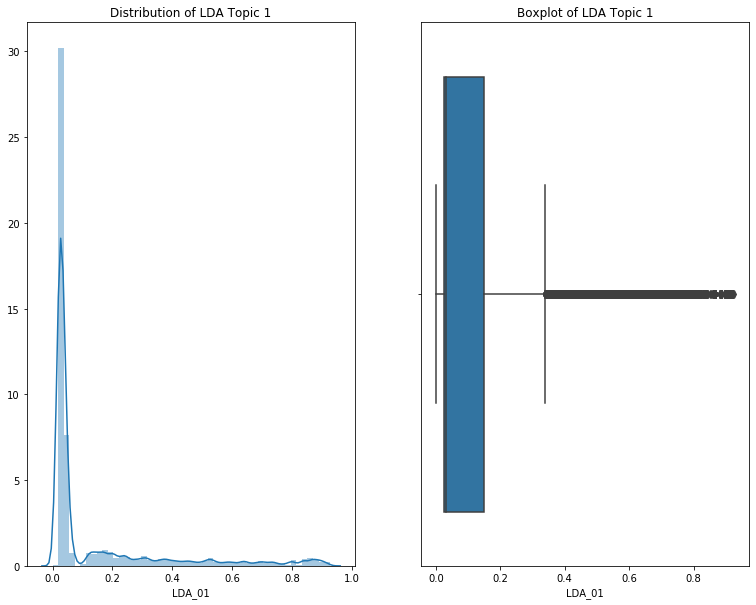

In [99]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.LDA_01)
plt.title("Distribution of LDA Topic 1")
plt.subplot(132)
sns.boxplot(df.LDA_01)
plt.title("Boxplot of LDA Topic 1")
plt.show()

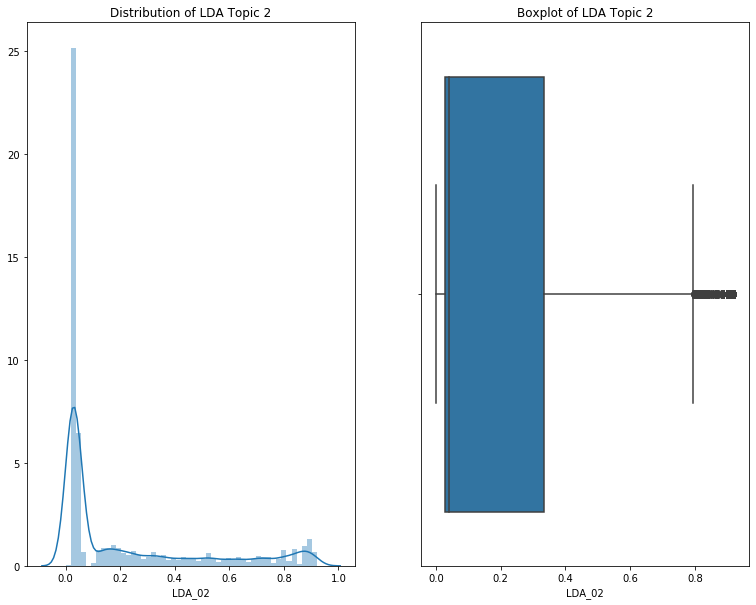

In [100]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.LDA_02)
plt.title("Distribution of LDA Topic 2")
plt.subplot(132)
sns.boxplot(df.LDA_02)
plt.title("Boxplot of LDA Topic 2")
plt.show()

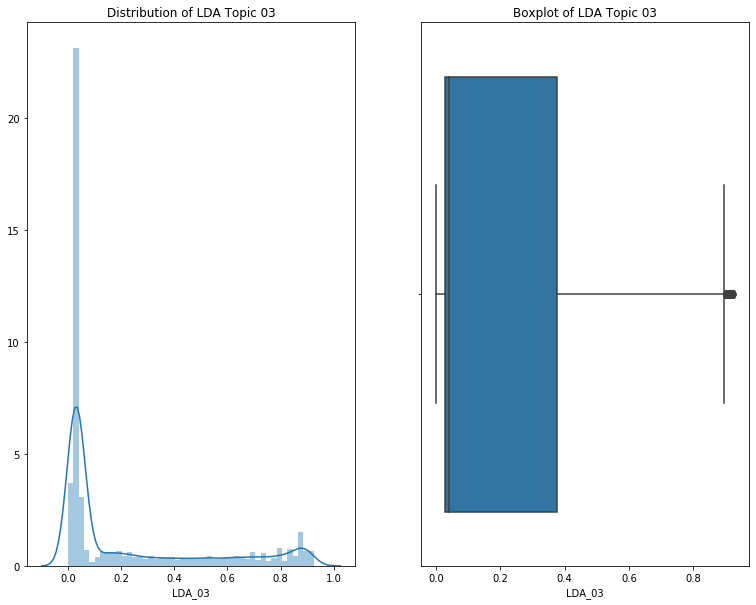

In [101]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.LDA_03)
plt.title("Distribution of LDA Topic 03")
plt.subplot(132)
sns.boxplot(df.LDA_03)
plt.title("Boxplot of LDA Topic 03")
plt.show()

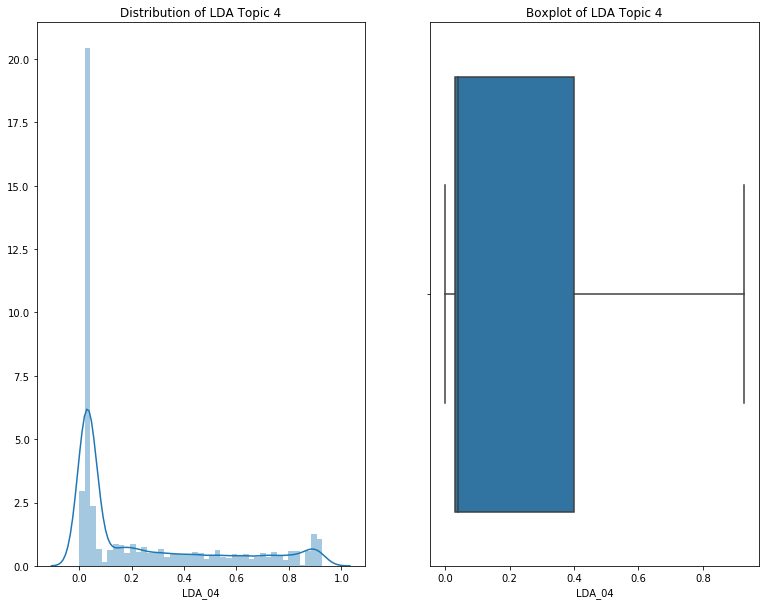

In [102]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.LDA_04)
plt.title("Distribution of LDA Topic 4")
plt.subplot(132)
sns.boxplot(df.LDA_04)
plt.title("Boxplot of LDA Topic 4")
plt.show()

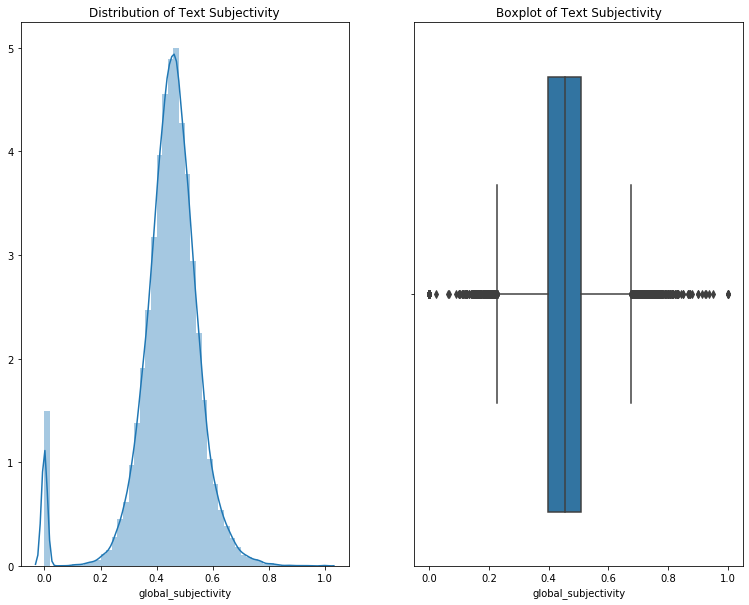

In [103]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.global_subjectivity)
plt.title("Distribution of Text Subjectivity")
plt.subplot(132)
sns.boxplot(df.global_subjectivity)
plt.title("Boxplot of Text Subjectivity")
plt.show()

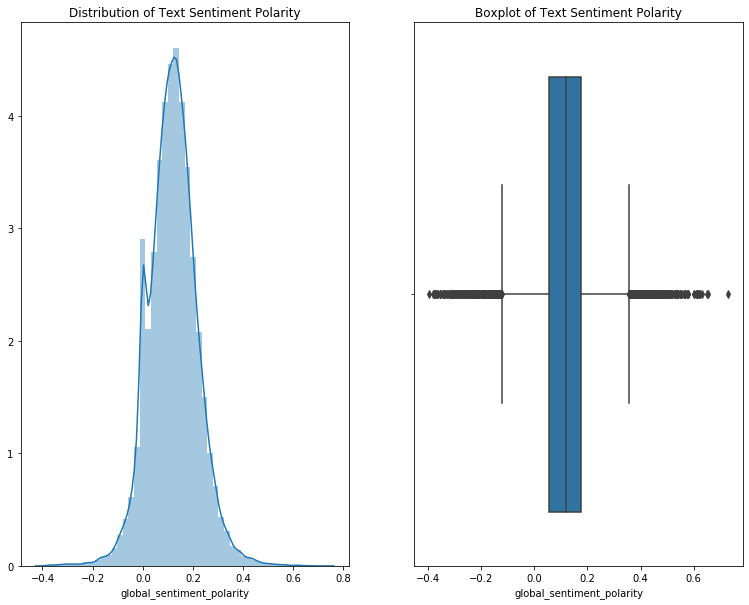

In [104]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.global_sentiment_polarity)
plt.title("Distribution of Text Sentiment Polarity")
plt.subplot(132)
sns.boxplot(df.global_sentiment_polarity)
plt.title("Boxplot of Text Sentiment Polarity")
plt.show()

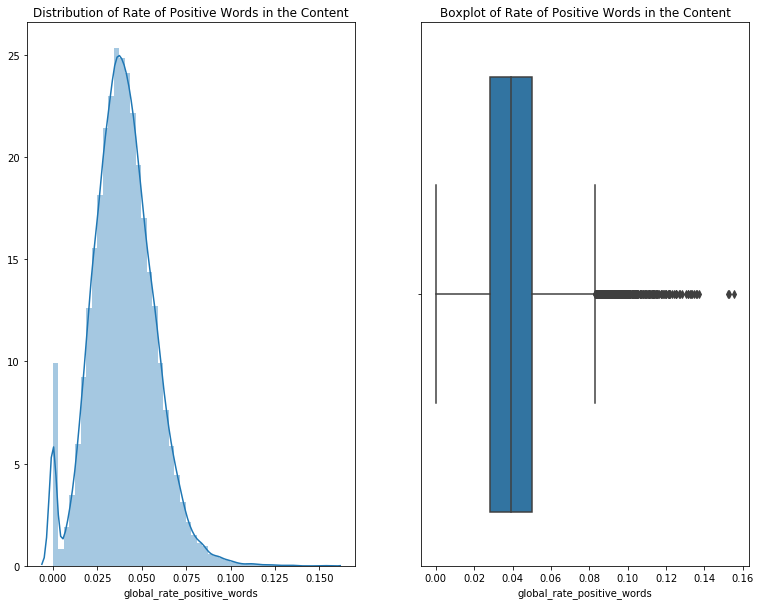

In [105]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.global_rate_positive_words)
plt.title("Distribution of Rate of Positive Words in the Content")
plt.subplot(132)
sns.boxplot(df.global_rate_positive_words)
plt.title("Boxplot of Rate of Positive Words in the Content")
plt.show()

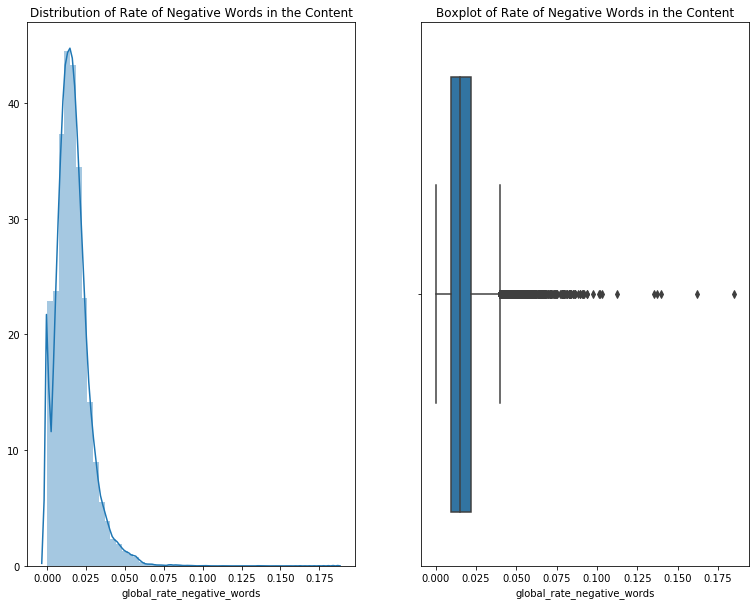

In [106]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.global_rate_negative_words)
plt.title("Distribution of Rate of Negative Words in the Content")
plt.subplot(132)
sns.boxplot(df.global_rate_negative_words)
plt.title("Boxplot of Rate of Negative Words in the Content")
plt.show()

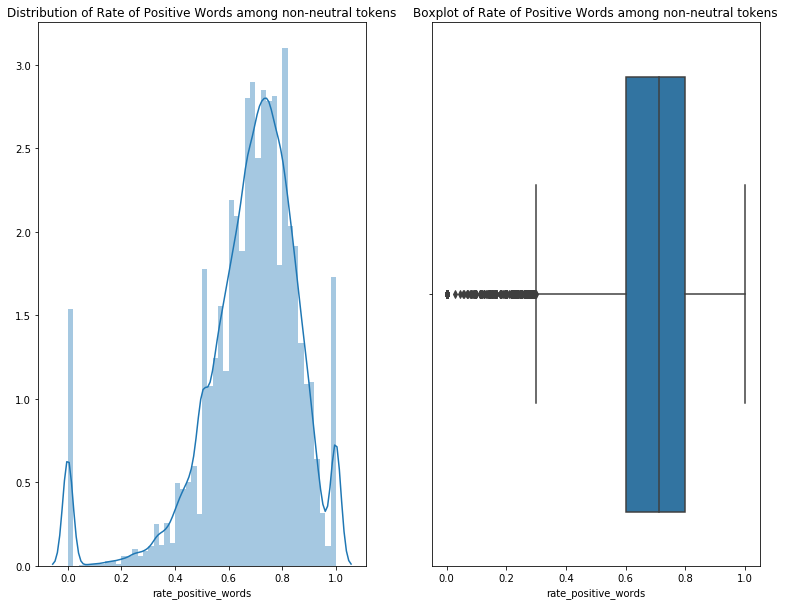

In [107]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.rate_positive_words)
plt.title("Distribution of Rate of Positive Words among non-neutral tokens")
plt.subplot(132)
sns.boxplot(df.rate_positive_words)
plt.title("Boxplot of Rate of Positive Words among non-neutral tokens")
plt.show()

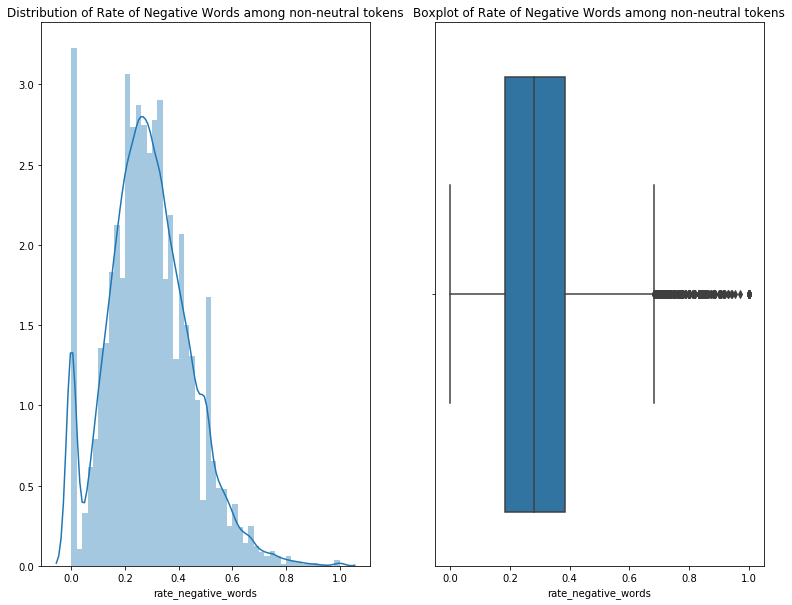

In [108]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.rate_negative_words)
plt.title("Distribution of Rate of Negative Words among non-neutral tokens")
plt.subplot(132)
sns.boxplot(df.rate_negative_words)
plt.title("Boxplot of Rate of Negative Words among non-neutral tokens")
plt.show()

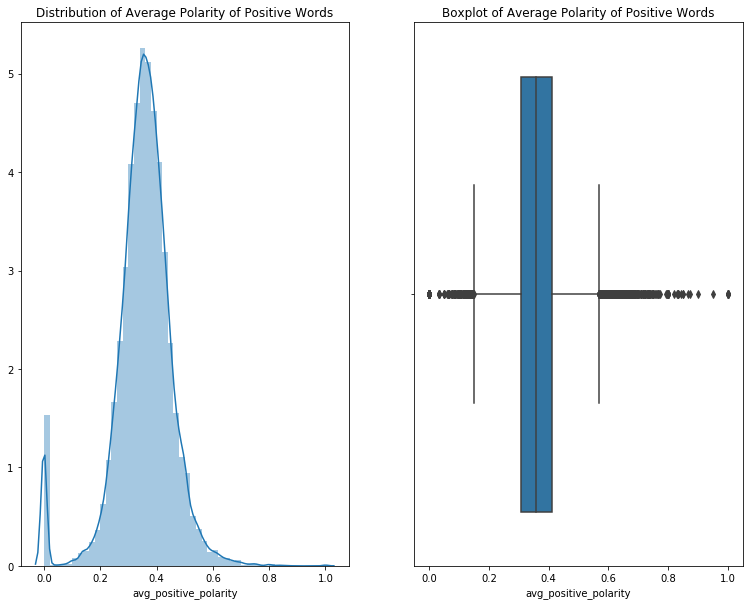

In [109]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.avg_positive_polarity)
plt.title("Distribution of Average Polarity of Positive Words")
plt.subplot(132)
sns.boxplot(df.avg_positive_polarity)
plt.title("Boxplot of Average Polarity of Positive Words")
plt.show()

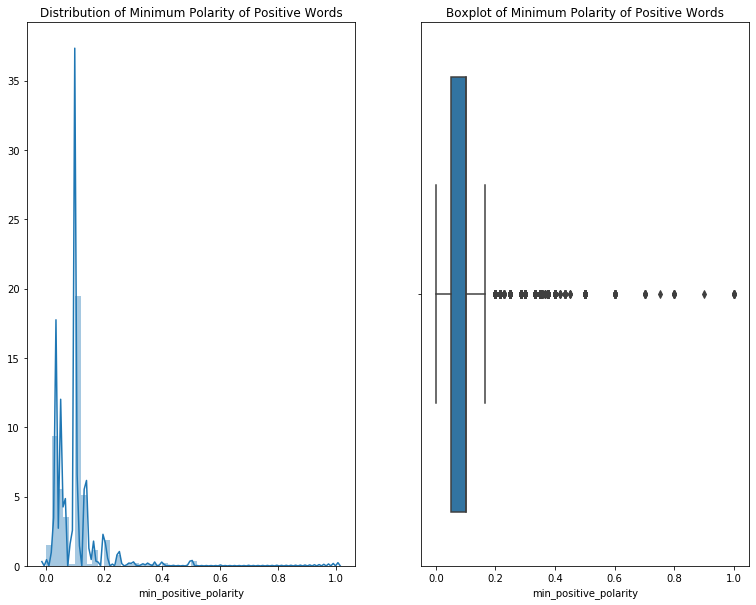

In [110]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.min_positive_polarity)
plt.title("Distribution of Minimum Polarity of Positive Words")
plt.subplot(132)
sns.boxplot(df.min_positive_polarity)
plt.title("Boxplot of Minimum Polarity of Positive Words")
plt.show()

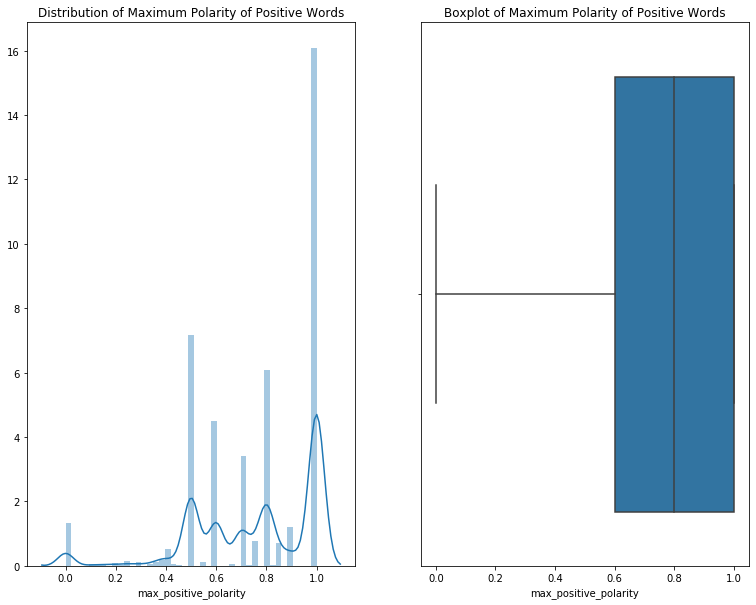

In [111]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.max_positive_polarity)
plt.title("Distribution of Maximum Polarity of Positive Words")
plt.subplot(132)
sns.boxplot(df.max_positive_polarity)
plt.title("Boxplot of Maximum Polarity of Positive Words")
plt.show()

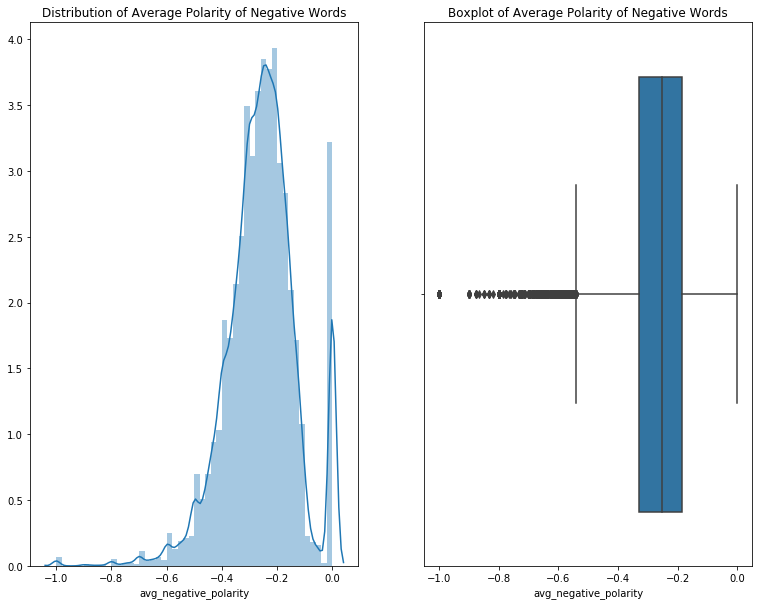

In [112]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.avg_negative_polarity)
plt.title("Distribution of Average Polarity of Negative Words")
plt.subplot(132)
sns.boxplot(df.avg_negative_polarity)
plt.title("Boxplot of Average Polarity of Negative Words")
plt.show()

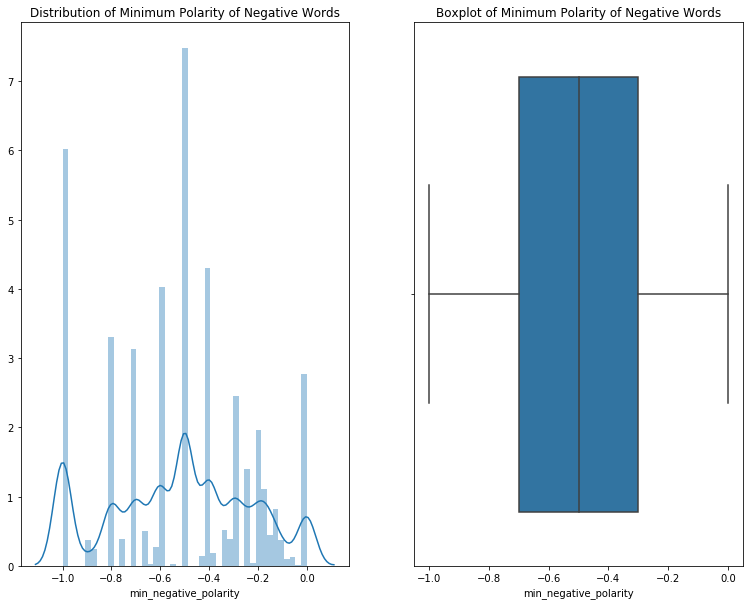

In [113]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.min_negative_polarity)
plt.title("Distribution of Minimum Polarity of Negative Words")
plt.subplot(132)
sns.boxplot(df.min_negative_polarity)
plt.title("Boxplot of Minimum Polarity of Negative Words")
plt.show()

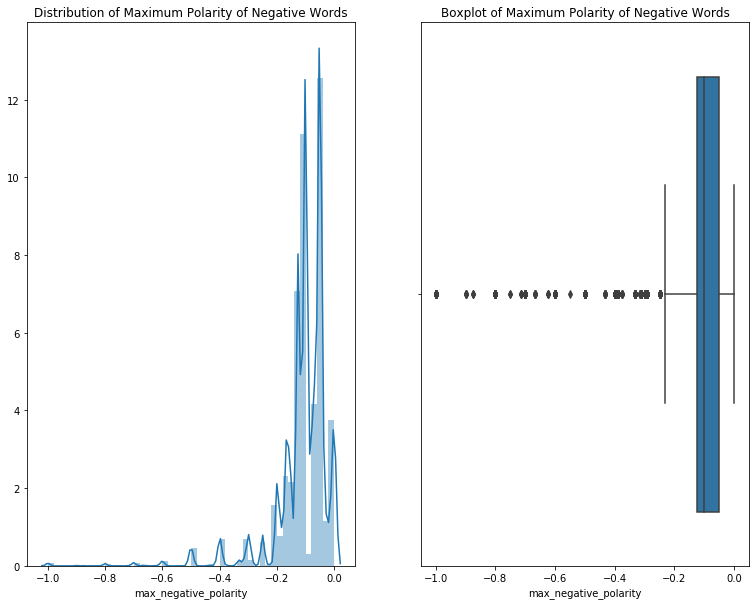

In [114]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.max_negative_polarity)
plt.title("Distribution of Maximum Polarity of Negative Words")
plt.subplot(132)
sns.boxplot(df.max_negative_polarity)
plt.title("Boxplot of Maximum Polarity of Negative Words")
plt.show()

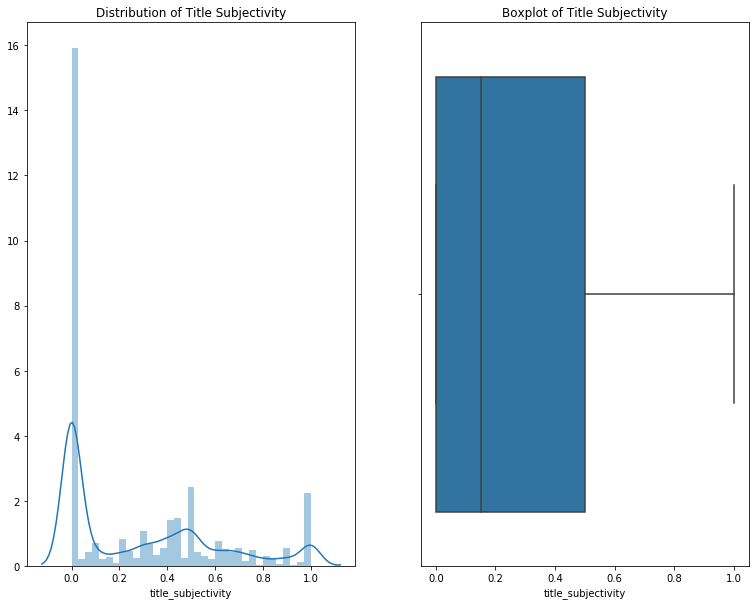

In [115]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.title_subjectivity)
plt.title("Distribution of Title Subjectivity")
plt.subplot(132)
sns.boxplot(df.title_subjectivity)
plt.title("Boxplot of Title Subjectivity")
plt.show()

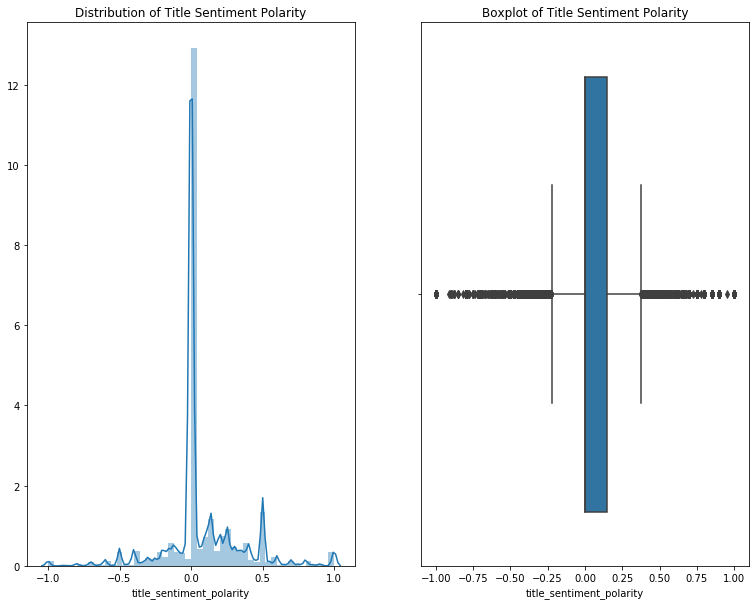

In [116]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.title_sentiment_polarity)
plt.title("Distribution of Title Sentiment Polarity")
plt.subplot(132)
sns.boxplot(df.title_sentiment_polarity)
plt.title("Boxplot of Title Sentiment Polarity")
plt.show()

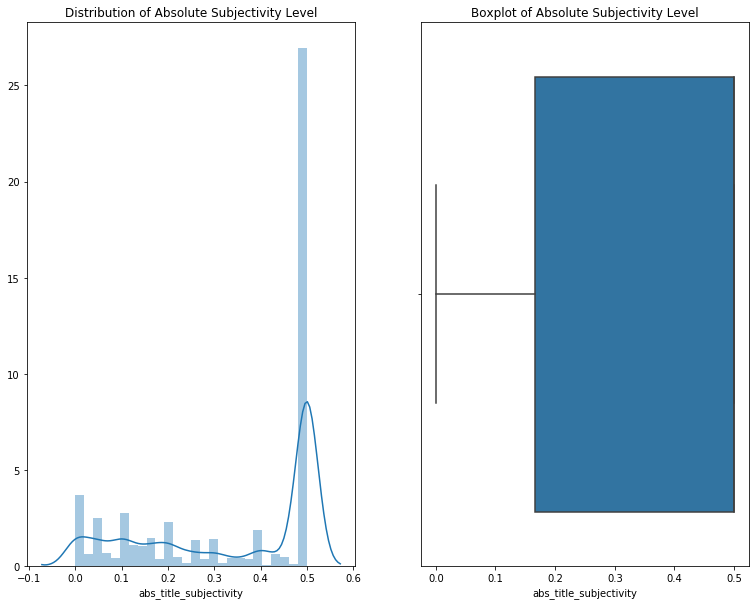

In [117]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.abs_title_subjectivity)
plt.title("Distribution of Absolute Subjectivity Level")
plt.subplot(132)
sns.boxplot(df.abs_title_subjectivity)
plt.title("Boxplot of Absolute Subjectivity Level")
plt.show()

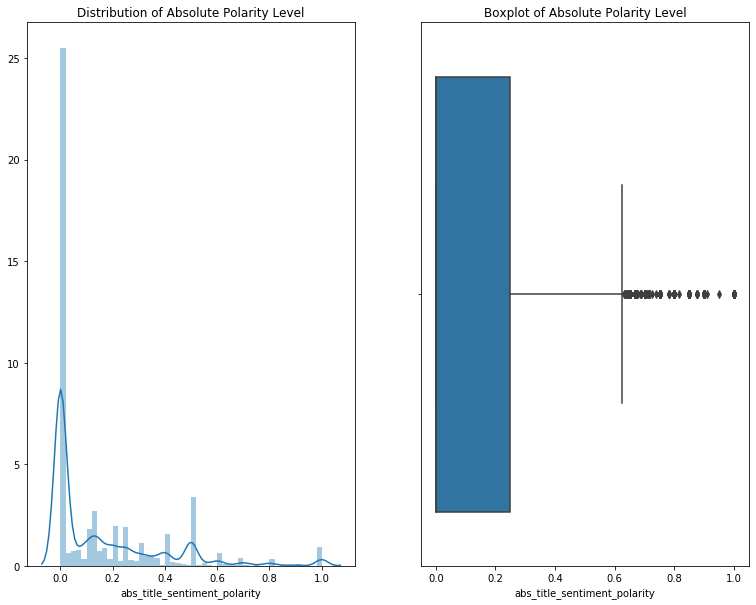

In [118]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.abs_title_sentiment_polarity)
plt.title("Distribution of Absolute Polarity Level")
plt.subplot(132)
sns.boxplot(df.abs_title_sentiment_polarity)
plt.title("Boxplot of Absolute Polarity Level")
plt.show()

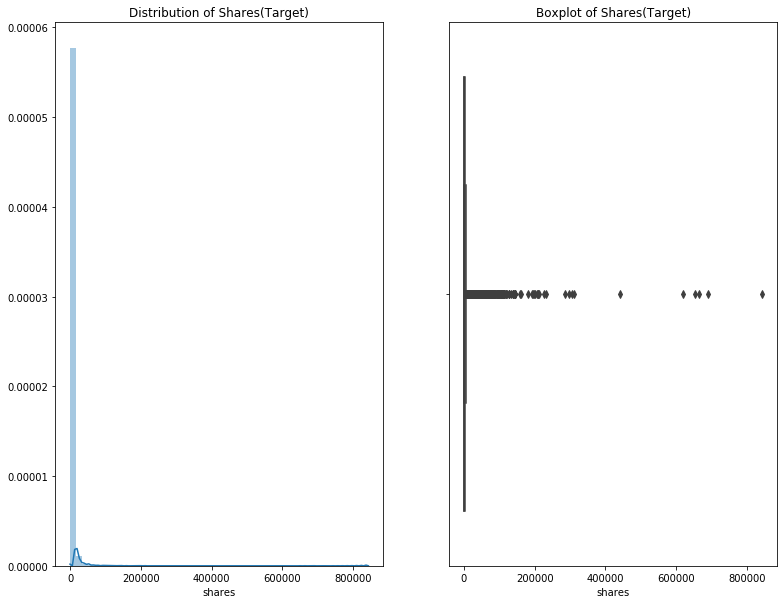

In [119]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.shares)
plt.title("Distribution of Shares(Target)")
plt.subplot(132)
sns.boxplot(df.shares)
plt.title("Boxplot of Shares(Target)")
plt.show()

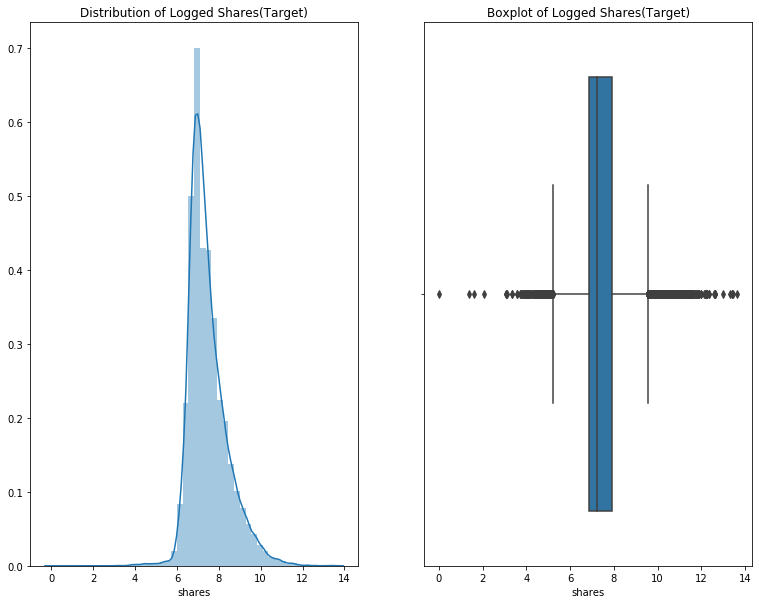

In [120]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(np.log(df.shares))
plt.title("Distribution of Logged Shares(Target)")
plt.subplot(132)
sns.boxplot(np.log(df.shares))
plt.title("Boxplot of Logged Shares(Target)")
plt.show()

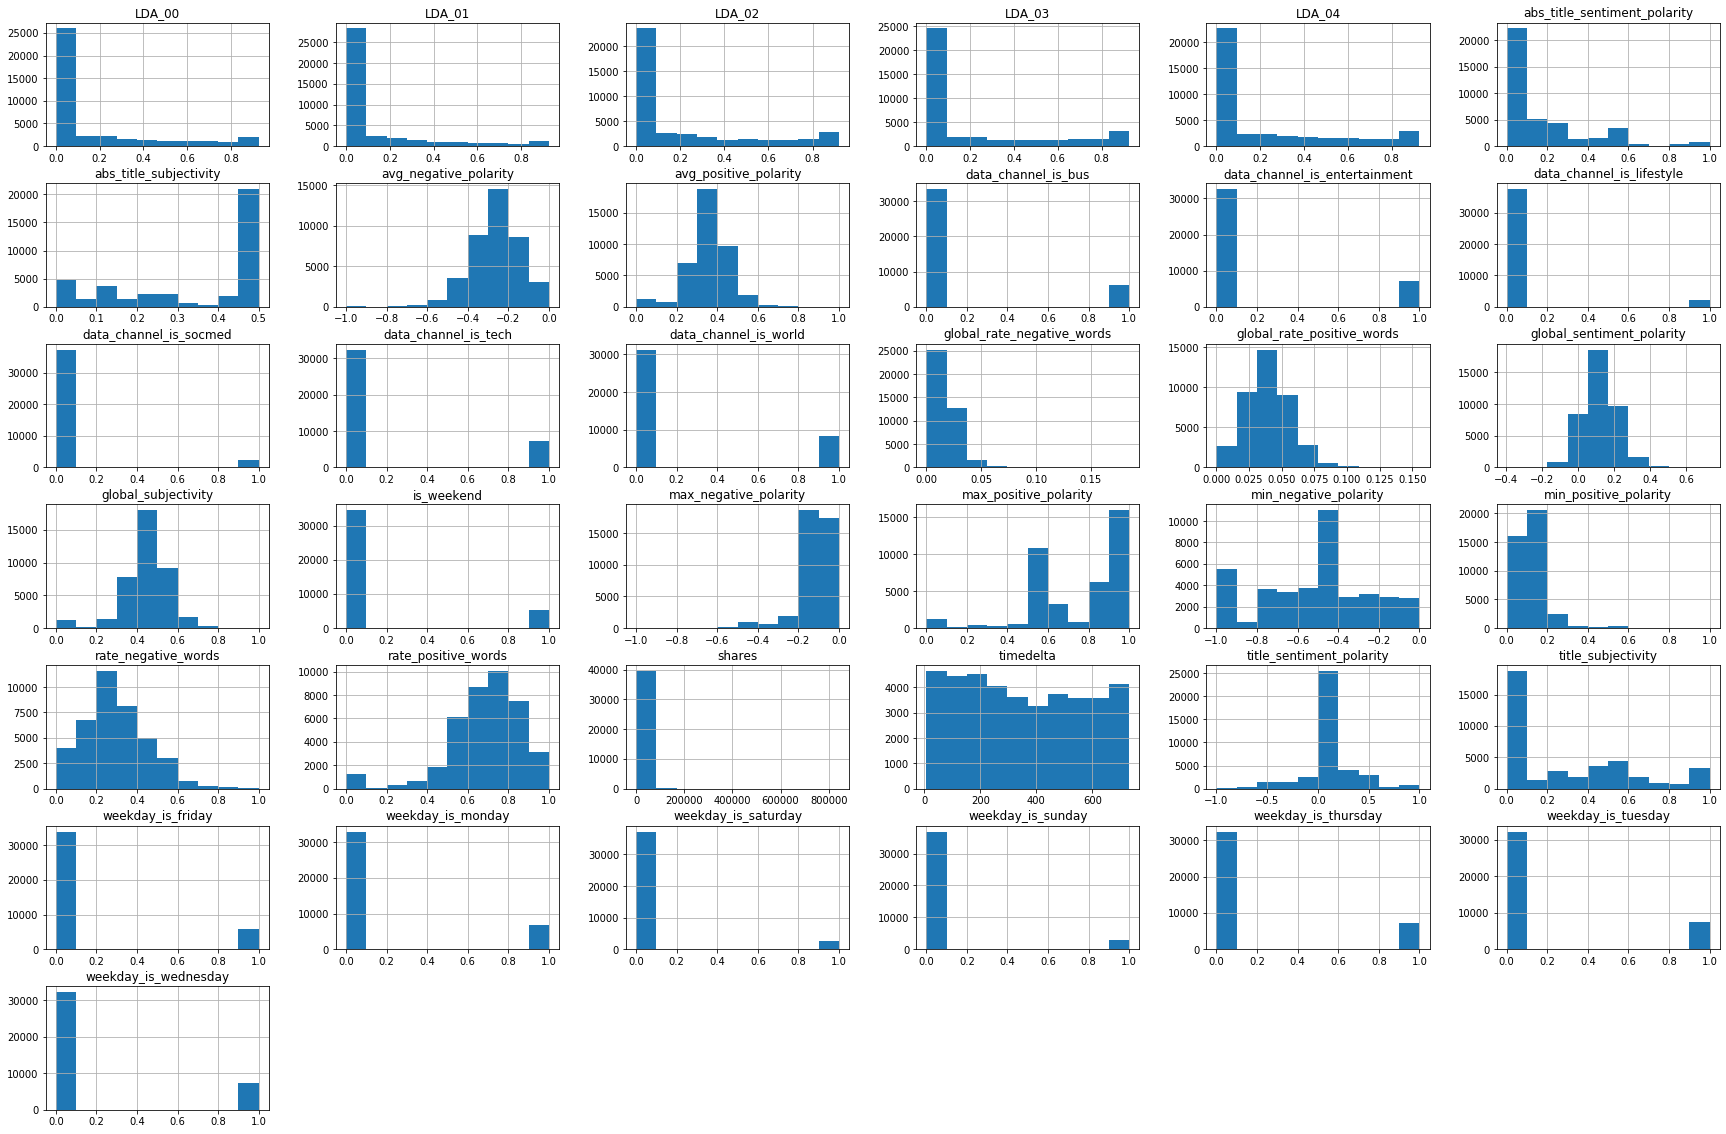

<Figure size 432x288 with 0 Axes>

In [121]:
data.hist(figsize=[30,20])
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()

<Figure size 2880x2160 with 0 Axes>

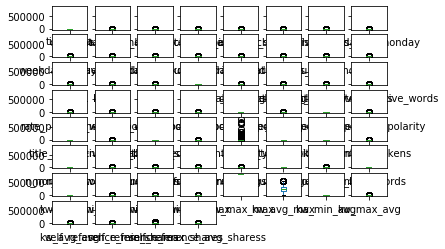

<Figure size 432x288 with 0 Axes>

In [122]:
plt.close("all")
plt.figure(figsize=[40,30])
df.plot(kind="box",subplots=True,sharey=True,sharex=False,layout=(8,8))
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()

#### Bivariate Analysis

For Numerical vs Numerical - Scatterplot

For Categorical vs Numerical - Boxplot | Violinplot

For Categorical vs Categorical - pd.crosstab | Table | Barplot

In [ ]:
plt.figure(figsize=[20,15])
sns.pairplot(df)
plt.show()

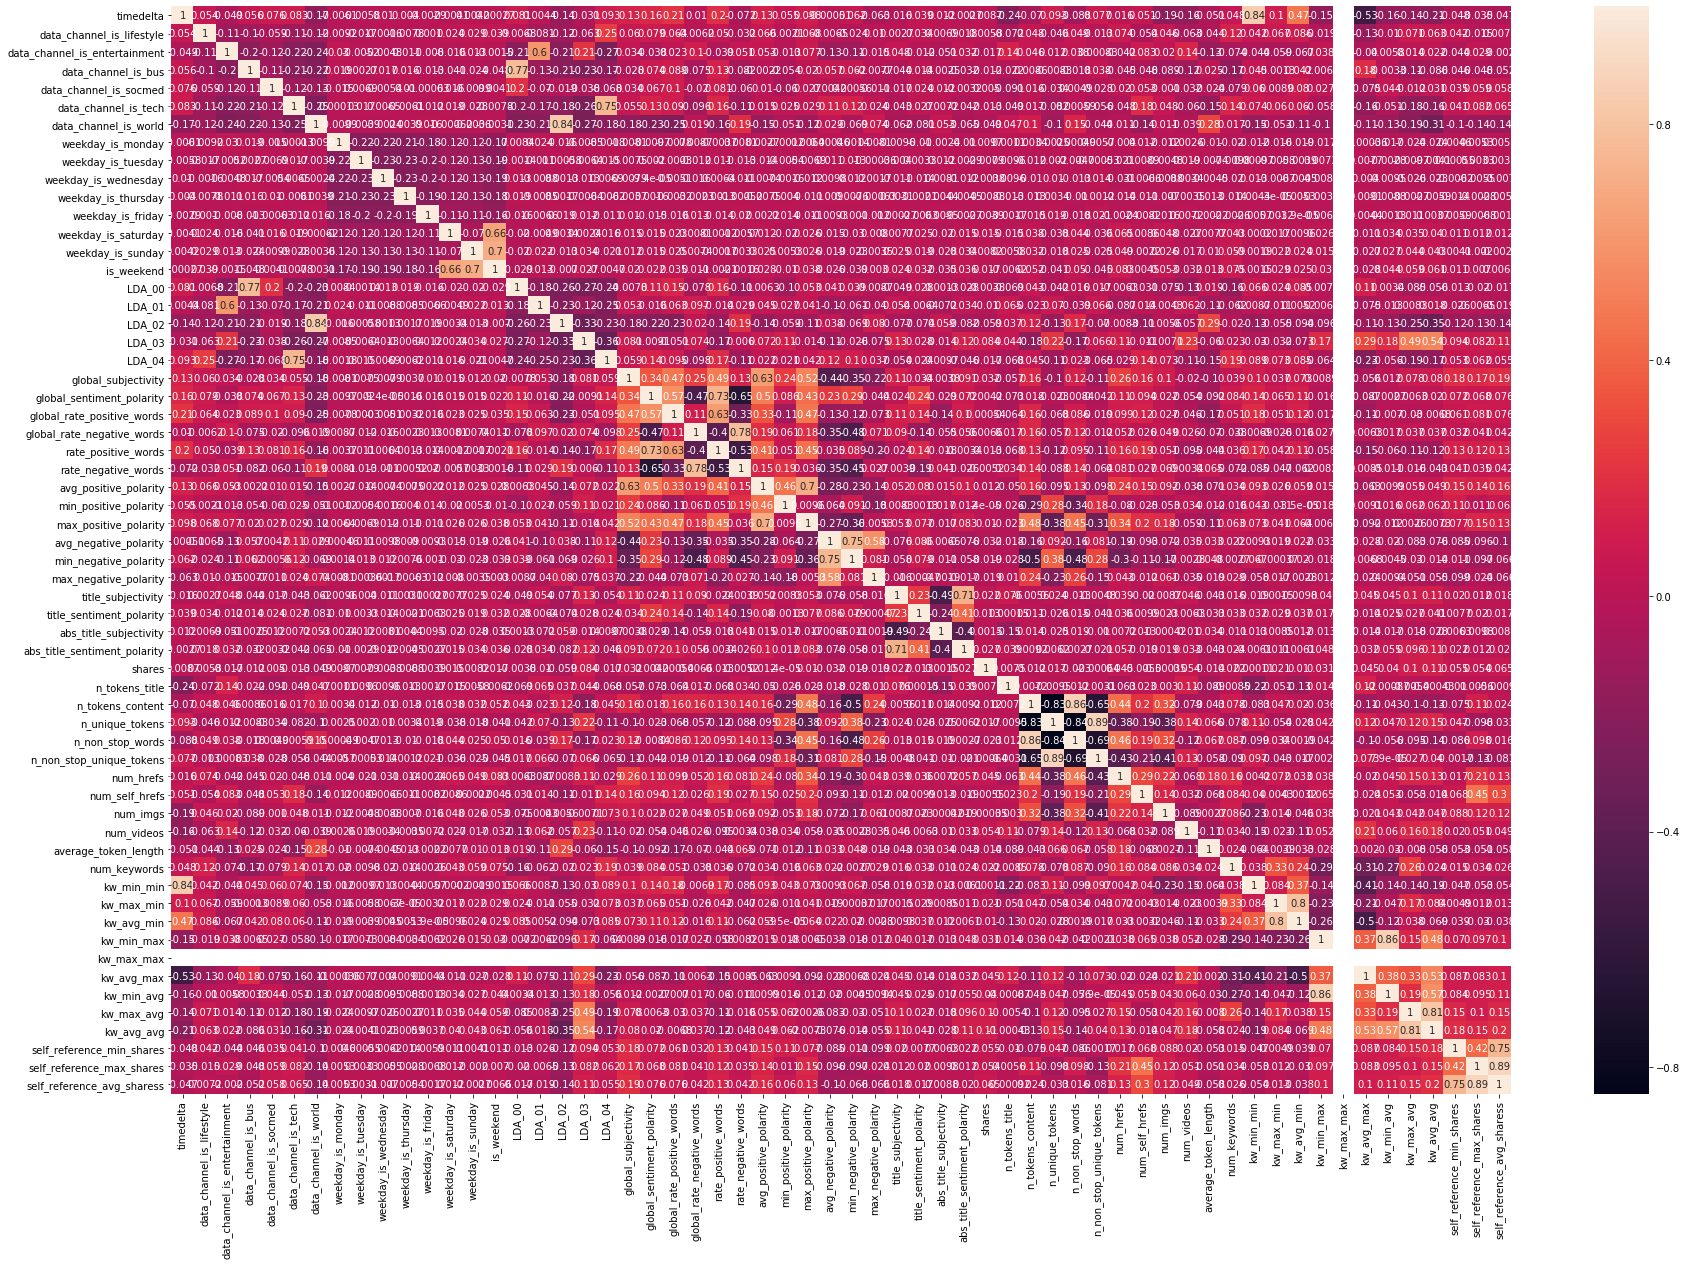

In [123]:
plt.figure(figsize=[30,20])
sns.heatmap(df.corr(),annot=True)
plt.show()

In [127]:
df["data_channel_is_lifestyle"].value_counts()

0.0    37545
1.0     2099
Name: data_channel_is_lifestyle, dtype: int64

In [128]:
df["data_channel_is_entertainment"].value_counts()

0.0    32587
1.0     7057
Name: data_channel_is_entertainment, dtype: int64

In [129]:
df["data_channel_is_socmed"].value_counts()

0.0    37321
1.0     2323
Name: data_channel_is_socmed, dtype: int64

In [130]:
df["data_channel_is_bus"].value_counts()

0.0    33386
1.0     6258
Name: data_channel_is_bus, dtype: int64

In [131]:
df["data_channel_is_tech"].value_counts()

0.0    32298
1.0     7346
Name: data_channel_is_tech, dtype: int64

In [132]:
df["data_channel_is_world"].value_counts()

0.0    31217
1.0     8427
Name: data_channel_is_world, dtype: int64

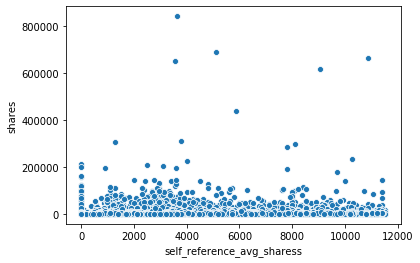

<Figure size 432x288 with 0 Axes>

In [133]:
sns.scatterplot(df.self_reference_avg_sharess,data.shares)
plt.show()
plt.tight_layout()

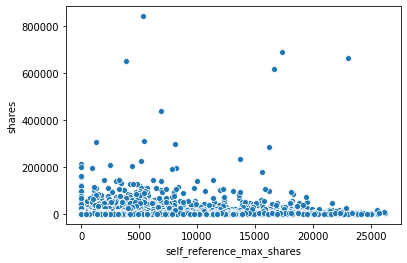

<Figure size 432x288 with 0 Axes>

In [134]:
sns.scatterplot(df.self_reference_max_shares,data.shares)
plt.show()
plt.tight_layout()

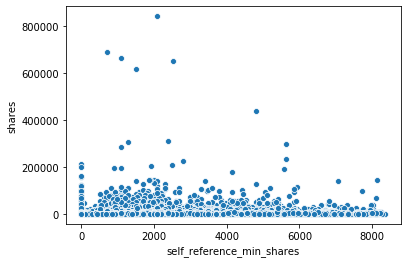

<Figure size 432x288 with 0 Axes>

In [135]:
sns.scatterplot(df.self_reference_min_shares,data.shares)
plt.show()
plt.tight_layout()

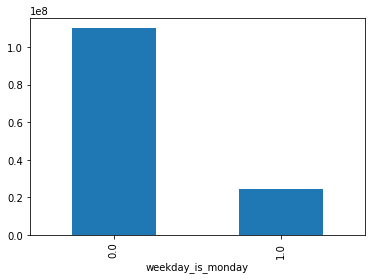

<Figure size 432x288 with 0 Axes>

In [136]:
df.groupby("weekday_is_monday")["shares"].sum().plot("bar")
plt.show()
plt.tight_layout()

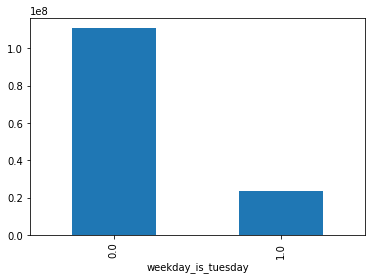

<Figure size 432x288 with 0 Axes>

In [137]:
df.groupby("weekday_is_tuesday")["shares"].sum().plot("bar")
plt.show()
plt.tight_layout()

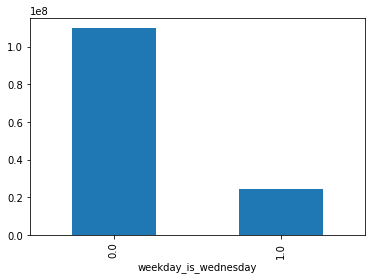

<Figure size 432x288 with 0 Axes>

In [138]:
df.groupby("weekday_is_wednesday")["shares"].sum().plot("bar")
plt.show()
plt.tight_layout()

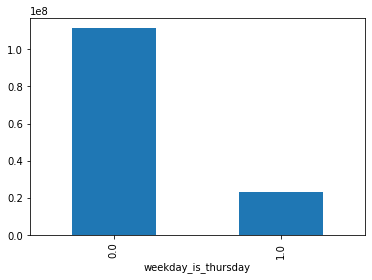

<Figure size 432x288 with 0 Axes>

In [139]:
df.groupby("weekday_is_thursday")["shares"].sum().plot("bar")
plt.show()
plt.tight_layout()

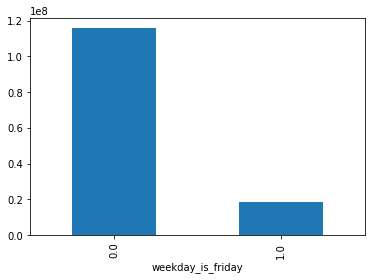

<Figure size 432x288 with 0 Axes>

In [140]:
df.groupby("weekday_is_friday")["shares"].sum().plot("bar")
plt.show()
plt.tight_layout()

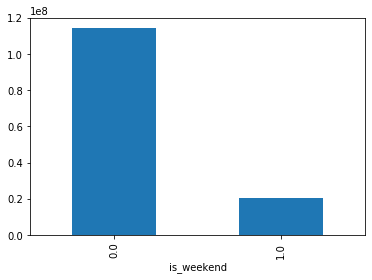

<Figure size 432x288 with 0 Axes>

In [141]:
df.groupby("is_weekend")["shares"].sum().plot("bar")
plt.show()
plt.tight_layout()

### Defining X and Y and performing a Train-Test Split

In [142]:
x = df.drop(["url","timedelta","shares"],axis=1)
y = df.shares
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=0,test_size=0.2)
print("xtrain shape: ",xtrain.shape)
print("xtest shape: ",xtest.shape)
print("ytrain shape: ",ytrain.shape)
print("ytest shape: ",ytest.shape)

xtrain shape:  (31715, 58)
xtest shape:  (7929, 58)
ytrain shape:  (31715,)
ytest shape:  (7929,)


### Building different models and algorithms

#### Linear Regressor

In [143]:
lr = LinearRegression()

In [144]:
lr_pred = lr.fit(xtrain,ytrain).predict(xtest)

In [145]:
r2_score(ytest,lr_pred)

-892263.9806573879

In [146]:
training_accuracy = lr.score(xtrain,ytrain)
testing_accuracy = lr.score(xtest,ytest)
print("Training Accuracy is:",training_accuracy)
print("Testing Accuracy is:",testing_accuracy)

Training Accuracy is: 0.022251856742658505
Testing Accuracy is: -892263.9806573879


In [147]:
np.sqrt(mean_squared_error(ytest,lr_pred))

8240461.279443448

#### Gradient Boosting Regressor

In [148]:
gbr = GradientBoostingRegressor()
gbr_pred = gbr.fit(xtrain,ytrain).predict(xtest)

In [149]:
training_accuracy = gbr.score(xtrain,ytrain)
testing_accuracy = gbr.score(xtest,ytest)
print("Training Accuracy is:",training_accuracy)
print("Testing Accuracy is:",testing_accuracy)

Training Accuracy is: 0.42298930665489076
Testing Accuracy is: -0.11337593767336362


In [150]:
np.sqrt(mean_squared_error(ytest,gbr_pred))

9205.036490202196

### Checking Skewness

In [151]:
df.shares.skew()

33.96388487571415

In [152]:
np.log(df.shares).skew()

1.017799445530757

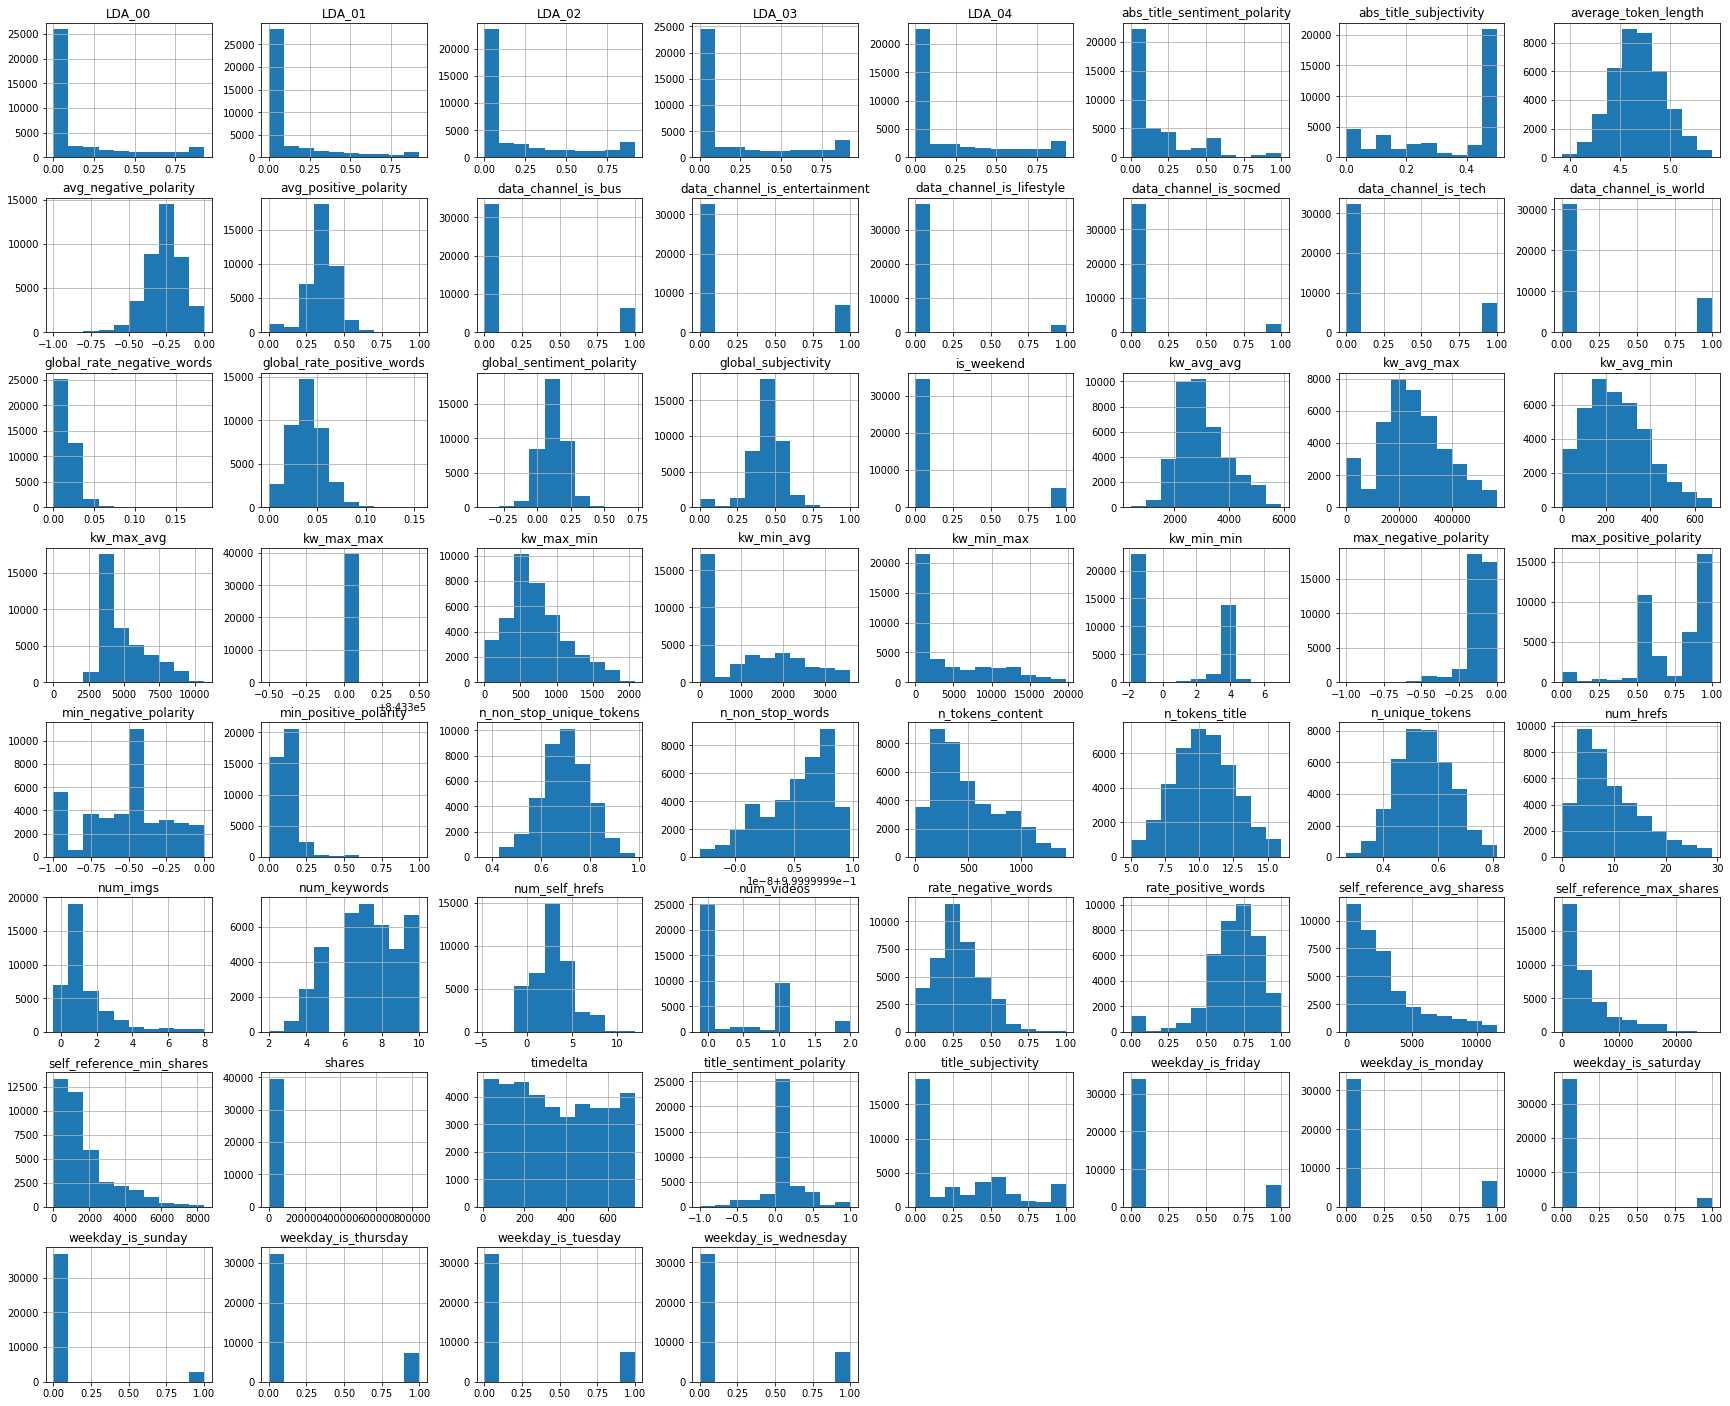

In [153]:
df.hist(figsize=[30,25]);

In [154]:
num_columns = df.columns[df.dtypes.isin(["float64","int64"])]

In [155]:
len(num_columns)

0

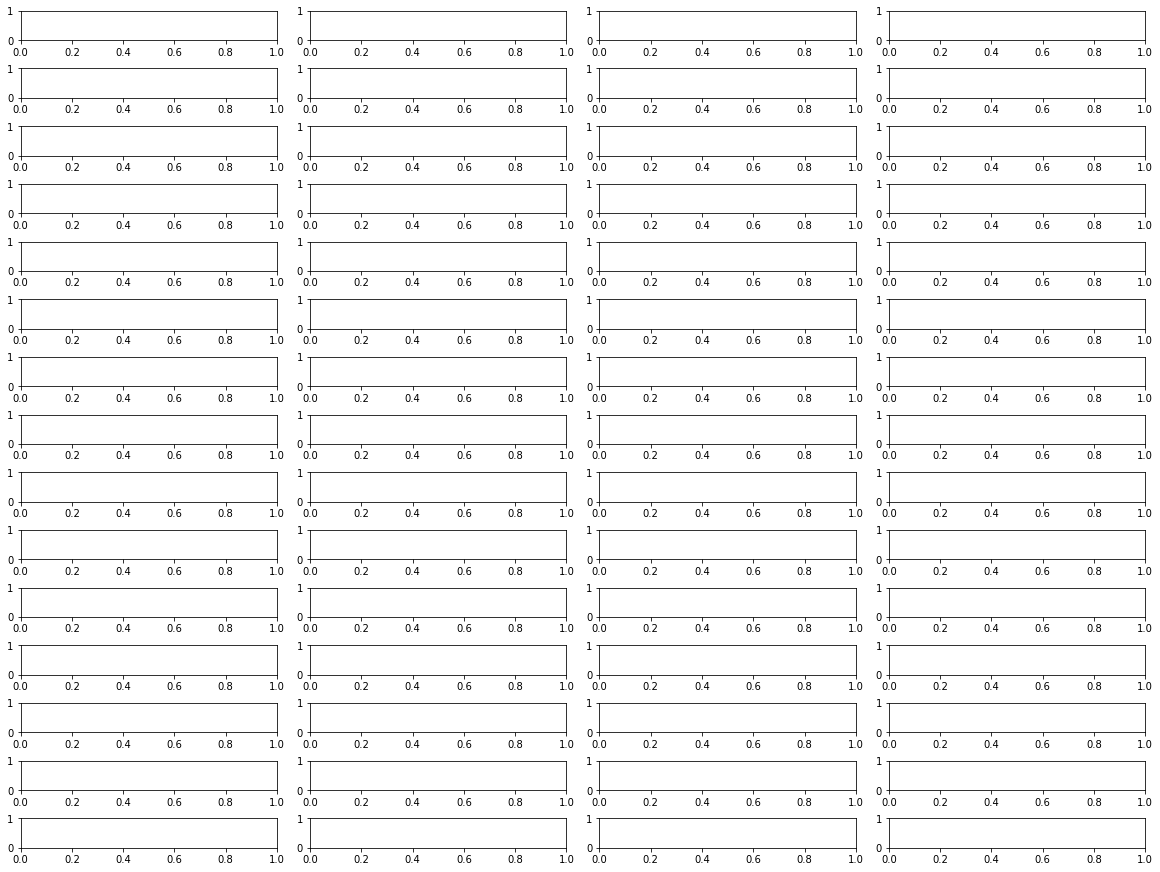

In [156]:
figs, axes = plt.subplots(15,4, figsize=(16,12), constrained_layout=True)
for col, ax in zip(num_columns, axes.flat):
    sns.distplot(df[col], ax=ax)
plt.show()

In [157]:
df[num_columns].skew().values

array([], dtype=float64)

In [158]:
pd.DataFrame({"Columns":num_columns, "Before Transformation":df[num_columns].skew().values,
              "After Transformation":np.power(df[num_columns],1/5).skew().values}).sort_values("Before Transformation")

Empty DataFrame
Columns: [Columns, Before Transformation, After Transformation]
Index: []

### Models after using Standard Scaler

In [159]:
ss = StandardScaler()

In [160]:
xtrain_scaled=ss.fit_transform(xtrain)

In [161]:
xtest_scaled = ss.transform(xtest)

In [162]:
gbr = GradientBoostingRegressor(random_state=0)

In [163]:
gbr_pred = gbr.fit(xtrain_scaled,ytrain).predict(xtest_scaled)

In [164]:
training_accuracy = gbr.score(xtrain_scaled,ytrain)
testing_accuracy = gbr.score(xtest_scaled,ytest)
print("Training Accuracy is:",training_accuracy)
print("Testing Accuracy is:",testing_accuracy)

Training Accuracy is: 0.4497264104765908
Testing Accuracy is: -0.28445098592148277


In [165]:
np.sqrt(mean_squared_error(ytest,gbr_pred))

9886.97343193166

In [166]:
! pip install xgboost

In [167]:
from xgboost import XGBRegressor,XGBRFRegressor,XGBClassifier,XGBRFClassifier

In [168]:
xgb = XGBRegressor(random_state=0)

In [169]:
xgb_pred = xgb.fit(xtrain_scaled,ytrain).predict(xtest_scaled)

C:\Users\Toshiba\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[03:02:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [170]:
np.sqrt(mean_squared_error(ytest,xgb_pred))

9014.570800583142

### Logged Target Models

In [171]:
df["logged_shares"]=np.log(df.shares)

In [173]:
x = df.drop(["url","timedelta","logged_shares","shares"],axis=1)
y = df.logged_shares
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=0,test_size=0.2)
print("xtrain shape: ",xtrain.shape)
print("xtest shape: ",xtest.shape)
print("ytrain shape: ",ytrain.shape)
print("ytest shape: ",ytest.shape)

xtrain shape:  (31715, 58)
xtest shape:  (7929, 58)
ytrain shape:  (31715,)
ytest shape:  (7929,)


In [174]:
SS = StandardScaler()

In [175]:
SCALED_XTRAIN = SS.fit_transform(xtrain)

In [176]:
SCALED_XTEST= SS.transform(xtest)

In [177]:
df.columns

Index(['url', 'timedelta', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity', 'shares', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
      

In [178]:
LR = LinearRegression()
LR_Predict = LR.fit(SCALED_XTRAIN,ytrain).predict(SCALED_XTEST)

In [179]:
inverse_LR_Predict = np.exp(LR_Predict)

In [180]:
np.sqrt(mean_squared_error(ytest,inverse_LR_Predict))

1981.9941877679712

In [181]:
r2_score(ytest,LR_Predict)

-206315903373171.34

#### XGBoost Regressor

In [186]:
xgb = XGBRegressor(random_state=0)

In [187]:
xgb_pred = xgb.fit(SCALED_XTRAIN,ytrain).predict(SCALED_XTEST)

C:\Users\Toshiba\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[03:04:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [188]:
inverse_transformed = np.exp(xgb_pred)
inverse_transformed

array([1063.4434, 1725.2634, 2269.3152, ..., 2256.5823, 1098.0548,
       1950.0813], dtype=float32)

In [189]:
np.sqrt(mean_squared_error(ytest,inverse_transformed))

1971.5646045430074

In [194]:
print(round(r2_score(ytest,xgb_pred)*100),"%")

15.0 %


#### Random Forest Regressor

In [195]:
rf = RandomForestRegressor(random_state=0)

In [196]:
rf_pred = rf.fit(SCALED_XTRAIN,ytrain).predict(SCALED_XTEST)

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [197]:
training_accuracy = rf.score(xtrain_scaled,ytrain)
testing_accuracy = rf.score(xtest_scaled,ytest)
print("Training Accuracy is:",training_accuracy)
print("Testing Accuracy is:",testing_accuracy)

Training Accuracy is: 0.8313017565623766
Testing Accuracy is: 0.0491377642600882


In [198]:
INVERSE_TRANSFORMED = np.exp(rf_pred)
INVERSE_TRANSFORMED

array([1389.12619615, 1280.33750182, 2732.17249099, ..., 1858.23308347,
       1728.30721276, 1847.37819265])

In [199]:
np.sqrt(mean_squared_error(ytest,INVERSE_TRANSFORMED))

2348.909897027611

In [200]:
df.columns

Index(['url', 'timedelta', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity', 'shares', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
      

### OLS Regression Model

In [201]:
model = sm.OLS(df.shares,df.drop(["logged_shares","shares","url","timedelta","LDA_00","LDA_03","data_channel_is_tech","data_channel_is_bus","data_channel_is_socmed","data_channel_is_lifestyle","data_channel_is_world","LDA_01","LDA_04","global_sentiment_polarity","global_rate_negative_words","avg_positive_polarity","avg_positive_polarity","max_positive_polarity","avg_negative_polarity","max_negative_polarity","title_subjectivity","title_sentiment_polarity","n_tokens_content","n_unique_tokens","abs_title_subjectivity","abs_title_sentiment_polarity","num_imgs","average_token_length","num_keywords","kw_max_min","kw_avg_min","kw_min_max","kw_max_avg","self_reference_min_shares","self_reference_max_shares"],axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     36.84
Date:                Mon, 18 Nov 2019   Prob (F-statistic):          3.21e-169
Time:                        03:06:26   Log-Likelihood:            -4.2693e+05
No. Observations:               39644   AIC:                         8.539e+05
Df Residuals:                   39619   BIC:                         8.541e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
data_channel_is_entertainment  -898.9011    161.340     -5.571      0.000   -1215.131    -582.671
weekday_is_monday             -7.736e+08   1.59e+08     -4.872      0.000   -1.08e+09   -4.62e+08
weekday_is_tuesday            -7.736e+08   1.59e+08     -4.872      0.000   -1.08e+09   -4.62e+08
weekday_is_wednesday          -7.736e+08   1.59e+08     -4.872      0.000   -1.08e+09   -4.62e+08
weekday_is_thursday           -7.736e+08   1.59e+08     -4.872      0.000   -1.08e+09   -4.62e+08
weekday_is_friday             -7.736e+08   1.59e+08     -4.872      0.000   -1.08e+09   -4.62e+08
weekday_is_saturday           -2.579e+08   5.29e+07     -4.872      0.000   -3.62e+08   -1.54e+08
weekday_is_sunday             -2.579e+08   5.29e+07     -4.872      0.000   -3.62e+08   -1.54e+08
is_weekend                    -5.157e+08   1.06e+08     -4.872      0.000   -7.23e+08   -3.08e+08
LDA_02                         -932.9580    244.228     -3.820      0.000   -1411.650    -454.266
global_subjectivity            2851.2168    768.507      3.710      0.000    1344.925    4357.509
global_rate_positive_words    -1.206e+04   4754.821     -2.537      0.011   -2.14e+04   -2742.323
rate_positive_words           -1527.1928    569.234     -2.683      0.007   -2642.906    -411.480
rate_negative_words           -1813.6698    601.715     -3.014      0.003   -2993.046    -634.294
min_positive_polarity         -3413.7628    974.106     -3.505      0.000   -5323.034   -1504.492
min_negative_polarity         -1008.2641    277.139     -3.638      0.000   -1551.462    -465.066
n_tokens_title                   91.7745     29.123      3.151      0.002      34.693     148.856
n_non_stop_words              -1.678e+11   3.44e+10     -4.872      0.000   -2.35e+11      -1e+11
n_non_stop_unique_tokens      -2051.3302    876.062     -2.342      0.019   -3768.432    -334.228
num_hrefs                        70.4818     11.115      6.341      0.000      48.697      92.267
num_self_hrefs                 -160.6910     32.030     -5.017      0.000    -223.472     -97.911
num_videos                      856.8577    106.536      8.043      0.000     648.044    1065.672
kw_min_min                      103.5951     28.028      3.696      0.000      48.659     158.531
kw_max_max                     1.999e+05    4.1e+04      4.872      0.000    1.19e+05     2.8e+05
kw_avg_max                       -0.0014      0.001     -2.237      0.025      -0.003      -0.000
kw_min_avg                       -0.2256      0.063     -3.557      0.000      -0.350      -0.101
kw_avg_avg                        1.2371      0.099     12.519      0.000       1.043       1.431
self_reference_avg_sharess        0.2093      0.024      8.798      0.000       0.163       0.256
=============================================

In [202]:
model = sm.OLS(df.logged_shares,df.drop(["logged_shares","shares","url","timedelta"],axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          logged_shares   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     112.7
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        03:06:33   Log-Likelihood:                -50561.
No. Observations:               39644   AIC:                         1.012e+05
Df Residuals:                   39589   BIC:                         1.017e+05
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
data_channel_is_lifestyle        -0.1461      0.030     -4.922      0.000      -0.204      -0.088
data_channel_is_entertainment    -0.2215      0.019    -11.691      0.000      -0.259      -0.184
data_channel_is_bus              -0.1875      0.029     -6.505      0.000      -0.244      -0.131
data_channel_is_socmed            0.0821      0.028      2.953      0.003       0.028       0.137
data_channel_is_tech              0.0523      0.028      1.874      0.061      -0.002       0.107
data_channel_is_world            -0.1160      0.028     -4.097      0.000      -0.171      -0.060
weekday_is_monday             -1.957e+04   2762.099     -7.084      0.000    -2.5e+04   -1.42e+04
weekday_is_tuesday            -1.957e+04   2762.099     -7.084      0.000    -2.5e+04   -1.42e+04
weekday_is_wednesday          -1.957e+04   2762.099     -7.084      0.000    -2.5e+04   -1.42e+04
weekday_is_thursday           -1.957e+04   2762.099     -7.084      0.000    -2.5e+04   -1.42e+04
weekday_is_friday             -1.957e+04   2762.099     -7.084      0.000    -2.5e+04   -1.42e+04
weekday_is_saturday            -3.64e+05   5.14e+04     -7.084      0.000   -4.65e+05   -2.63e+05
weekday_is_sunday              -3.64e+05   5.14e+04     -7.084      0.000   -4.65e+05   -2.63e+05
is_weekend                     3.445e+05   4.86e+04      7.084      0.000    2.49e+05     4.4e+05
LDA_00                           -1.1207      0.870     -1.288      0.198      -2.826       0.585
LDA_01                           -1.4691      0.870     -1.689      0.091      -3.174       0.236
LDA_02                           -1.5291      0.870     -1.757      0.079      -3.235       0.176
LDA_03                           -1.4453      0.870     -1.661      0.097      -3.150       0.260
LDA_04                           -1.3214      0.870     -1.519      0.129      -3.027       0.384
global_subjectivity               0.3739      0.064      5.837      0.000       0.248       0.500
global_sentiment_polarity        -0.1171      0.126     -0.931      0.352      -0.364       0.129
global_rate_positive_words       -1.1756      0.539     -2.182      0.029      -2.232      -0.119
global_rate_negative_words        0.7292      1.026      0.711      0.477      -1.281       2.739
rate_positive_words              -0.2959      0.051     -5.753      0.000      -0.397      -0.195
rate_negative_words              -0.4645      0.074     -6.312      0.000      -0.609      -0.320
avg_positive_polarity             0.0386      0.103      0.374      0.708      -0.164       0.241
min_positive_polarity            -0.3924      0.087     -4.513      0.000      -0.563      -0.222
max_positive_polarity             0.0132      0.033      0.400      0.689      -0.052       0.078
avg_negative_polarity            -0.1924     

#### Classification Problem

In [203]:
df.drop("logged_shares",axis=1,inplace=True)

In [204]:
df.shares.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [40]:
bins = [0,1400,843300]
df["Shares_Category"] = pd.cut(df.shares,bins,labels=["Unpopular","Popular"])

In [206]:
df.head()

url  timedelta  data_channel_is_lifestyle  data_channel_is_entertainment  data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  data_channel_is_world  weekday_is_monday  weekday_is_tuesday  weekday_is_wednesday  weekday_is_thursday  weekday_is_friday  weekday_is_saturday  weekday_is_sunday  is_weekend    LDA_00    LDA_01    LDA_02    LDA_03    LDA_04  global_subjectivity  global_sentiment_polarity  global_rate_positive_words  global_rate_negative_words  rate_positive_words  rate_negative_words  avg_positive_polarity  min_positive_polarity  max_positive_polarity  avg_negative_polarity  min_negative_polarity  max_negative_polarity  title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  abs_title_sentiment_polarity  shares  n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  average_token_length  num_keywords  \
0  http://mashable.com/2013/01/07/amazon-instant-...      731.0                        0.0                            1.0                  0.0                     0.0                   0.0                    0.0                1.0                 0.0                   0.0                  0.0                0.0                  0.0                0.0         0.0  0.500331  0.378279  0.040005  0.041263  0.040123             0.521617                   0.092562                    0.045662                    0.013699             0.769231             0.230769               0.378636               0.100000                    0.7              -0.350000                 -0.600              -0.200000            0.500000                 -0.187500                0.000000                      0.187500     593            12.0             219.0         0.663594               1.0                  0.815385        4.0        2.000000   1.00000         0.0              4.680365           5.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...      731.0                        0.0                            0.0                  1.0                     0.0                   0.0                    0.0                1.0                 0.0                   0.0                  0.0                0.0                  0.0                0.0         0.0  0.799756  0.050047  0.050096  0.050101  0.050001             0.341246                   0.148948                    0.043137                    0.015686             0.733333             0.266667               0.286915               0.033333                    0.7              -0.118750                 -0.125              -0.100000            0.000000                  0.000000                0.500000                      0.000000     711             9.0             255.0         0.604743               1.0                  0.791946        3.0        1.000000   1.00000         0.0              4.913725           4.0   
2  http://mashable.com/2013/01/07/apple-40-billio...      731.0                        0.0                            0.0                  1.0                     0.0                   0.0                    0.0                1.0                 0.0                   0.0                  0.0                0.0                  0.0                0.0         0.0  0.217792  0.033334  0.033351  0.033334  0.682188             0.702222                   0.323333                    0.056872                    0.009479             0.857143             0.142857               0.495833               0.100000                    1.0              -0.466667                 -0.800              -0.133333            0.000000                  0.000000                0.500000                      0.000000    1500             9.0             211.0         0.575130               1.0                  0.663866        3.0        1.000000   1.00000         0.0              4.393365           6.0   
3  http://mashable.com/2013/01/07/astronaut-notre...      731.0                        0.

#### Applying Classification Models 

In [207]:
X = df.drop(["Shares_Category","url","timedelta","shares"],axis=1)
Y = df.Shares_Category
XTRAIN,XTEST,YTRAIN,YTEST = train_test_split(X,Y,random_state=0,test_size=0.2)
print("xtrain shape: ",xtrain.shape)
print("xtest shape: ",xtest.shape)
print("ytrain shape: ",ytrain.shape)
print("ytest shape: ",ytest.shape)

xtrain shape:  (31715, 58)
xtest shape:  (7929, 58)
ytrain shape:  (31715,)
ytest shape:  (7929,)


In [208]:
# scaling
SS = StandardScaler()

In [209]:
XTRAIN_SCALED=ss.fit_transform(XTRAIN)
XTEST_SCALED= ss.transform(XTEST)

In [210]:
rfc = RandomForestClassifier(random_state=123)

In [211]:
predict_rfc = rfc.fit(XTRAIN_SCALED,YTRAIN).predict(XTEST_SCALED)

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [212]:
classificationreport = classification_report(YTEST,predict_rfc)
print("Classification Report is:",classificationreport)

Classification Report is:               precision    recall  f1-score   support

     Popular       0.59      0.68      0.63      3874
   Unpopular       0.64      0.54      0.59      4055

    accuracy                           0.61      7929
   macro avg       0.62      0.61      0.61      7929
weighted avg       0.62      0.61      0.61      7929



In [213]:
accuracy = accuracy_score(YTEST,predict_rfc)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.6121831252364737


In [214]:
gbc = GradientBoostingClassifier(random_state=123)
predict_gbc = gbc.fit(XTRAIN_SCALED,YTRAIN).predict(XTEST_SCALED)

In [215]:
classificationreport = classification_report(YTEST,predict_gbc)
print("Classification Report is:",classificationreport)

Classification Report is:               precision    recall  f1-score   support

     Popular       0.65      0.65      0.65      3874
   Unpopular       0.67      0.67      0.67      4055

    accuracy                           0.66      7929
   macro avg       0.66      0.66      0.66      7929
weighted avg       0.66      0.66      0.66      7929



In [216]:
accuracy = accuracy_score(YTEST,predict_gbc)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.6607390591499559


In [217]:
knn = KNeighborsClassifier()
predict_knn = knn.fit(XTRAIN_SCALED,YTRAIN).predict(XTEST_SCALED)

In [218]:
classificationreport = classification_report(YTEST,predict_knn)
print("Classification Report is:",classificationreport)

Classification Report is:               precision    recall  f1-score   support

     Popular       0.61      0.56      0.59      3874
   Unpopular       0.61      0.66      0.64      4055

    accuracy                           0.61      7929
   macro avg       0.61      0.61      0.61      7929
weighted avg       0.61      0.61      0.61      7929



In [219]:
accuracy = accuracy_score(YTEST,predict_knn)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.6129398410896708


In [220]:
dtc = DecisionTreeClassifier()
predict_dtc = dtc.fit(XTRAIN_SCALED,YTRAIN).predict(XTEST_SCALED)

In [221]:
classificationreport = classification_report(YTEST,predict_dtc)
print("Classification Report is:",classificationreport)

Classification Report is:               precision    recall  f1-score   support

     Popular       0.56      0.57      0.57      3874
   Unpopular       0.59      0.58      0.58      4055

    accuracy                           0.57      7929
   macro avg       0.57      0.57      0.57      7929
weighted avg       0.57      0.57      0.57      7929



In [222]:
accuracy = accuracy_score(YTEST,predict_dtc)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.5742212132677513


In [223]:
logreg = LogisticRegression()
predict_logreg = logreg.fit(XTRAIN_SCALED,YTRAIN).predict(XTEST_SCALED)

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [224]:
classificationreport = classification_report(YTEST,predict_logreg)
print("Classification Report is:",classificationreport)

Classification Report is:               precision    recall  f1-score   support

     Popular       0.64      0.62      0.63      3874
   Unpopular       0.65      0.67      0.66      4055

    accuracy                           0.65      7929
   macro avg       0.65      0.65      0.65      7929
weighted avg       0.65      0.65      0.65      7929



In [225]:
accuracy = accuracy_score(YTEST,predict_logreg)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.6476226510278724


In [226]:
xgbc = XGBClassifier(random_state=123)
predict_xgbc = xgbc.fit(XTRAIN_SCALED,YTRAIN).predict(XTEST_SCALED)

In [227]:
classificationreport = classification_report(YTEST,predict_xgbc)
print("Classification Report is:",classificationreport)

Classification Report is:               precision    recall  f1-score   support

     Popular       0.66      0.65      0.65      3874
   Unpopular       0.67      0.68      0.67      4055

    accuracy                           0.66      7929
   macro avg       0.66      0.66      0.66      7929
weighted avg       0.66      0.66      0.66      7929



In [228]:
accuracy = accuracy_score(YTEST,predict_xgbc)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.6643965191070753


#### Grid Search - Gradient Boosting Classifier

In [324]:
X = df.drop(["Shares_Category","url","timedelta","shares"],axis=1)
Y = df.Shares_Category
XTRAIN,XTEST,YTRAIN,YTEST = train_test_split(X,Y,random_state=0,test_size=0.2)

In [ ]:
GBC = GradientBoostingClassifier(random_state=123)

In [ ]:
params = {"min_samples_split": np.linspace(0.1,0.5,1,6),"min_samples_leaf": np.linspace(0.1,0.5,1,6),
          "max_features":["log2","sqrt"],'max_depth': [2,3,4,5,6,9]}
Grid_GBC = GridSearchCV(GBC, cv = 5,param_grid=params)
Grid_GBC.fit(XTRAIN_SCALED,YTRAIN)
print('Best Parameters using grid search:', Grid_GBC.best_params_)

In [234]:
gbc = GradientBoostingClassifier(random_state=123,max_depth= 9, max_features= 'sqrt', min_samples_leaf= 0.1, min_samples_split= 0.1)
predict_gbc = gbc.fit(XTRAIN,YTRAIN).predict(XTEST)

In [235]:
classificationreport = classification_report(YTEST,predict_gbc)
print("Classification Report is:",classificationreport)

Classification Report is:               precision    recall  f1-score   support

     Popular       0.65      0.67      0.66      3874
   Unpopular       0.67      0.65      0.66      4055

    accuracy                           0.66      7929
   macro avg       0.66      0.66      0.66      7929
weighted avg       0.66      0.66      0.66      7929



In [236]:
accuracy = accuracy_score(YTEST,predict_gbc)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.6596039853701602


In [237]:
! pip install lightgbm

In [240]:
import lightgbm as lgb

In [245]:
from lightgbm import LGBMClassifier,LGBMRegressor

In [278]:
lgbm = LGBMClassifier(random_state=123)
predict_lgbm = lgbm.fit(XTRAIN_SCALED,YTRAIN).predict(XTEST_SCALED)

In [279]:
classificationreport = classification_report(YTEST,predict_lgbm)
print("Classification Report is:",classificationreport)

Classification Report is:               precision    recall  f1-score   support

     Popular       0.65      0.65      0.65      3874
   Unpopular       0.67      0.67      0.67      4055

    accuracy                           0.66      7929
   macro avg       0.66      0.66      0.66      7929
weighted avg       0.66      0.66      0.66      7929



In [280]:
accuracy = accuracy_score(YTEST,predict_lgbm)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.6608651784588221


In [281]:
lgbm_imp_df = pd.DataFrame({"Columns":X.columns,"Important Features":lgbm.feature_importances_})

In [309]:
lgbm_imp_df

Columns  Important Features
0       data_channel_is_lifestyle                  12
1   data_channel_is_entertainment                  23
2             data_channel_is_bus                   1
3          data_channel_is_socmed                  34
4            data_channel_is_tech                  39
5           data_channel_is_world                   5
6               weekday_is_monday                   5
7              weekday_is_tuesday                   6
8            weekday_is_wednesday                   8
9             weekday_is_thursday                   2
10              weekday_is_friday                  14
11            weekday_is_saturday                  16
12              weekday_is_sunday                   0
13                     is_weekend                  58
14                         LDA_00                 139
15                         LDA_01                  93
16                         LDA_02                  93
17                         LDA_03                  75
18                         LDA_04                  66
19            global_subjectivity                  92
20      global_sentiment_polarity                  67
21     global_rate_positive_words                  75
22     global_rate_negative_words                  63
23            rate_positive_words                  45
24            rate_negative_words                  36
25          avg_positive_polarity                  64
26          min_positive_polarity                  40
27          max_positive_polarity                  17
28          avg_negative_polarity                  56
29          min_negative_polarity                  19
30          max_negative_polarity                  26
31             title_subjectivity                  44
32       title_sentiment_polarity                  45
33         abs_title_subjectivity                  24
34   abs_title_sentiment_polarity                  35
35                 n_tokens_title                  26
36               n_tokens_content                  67
37                n_unique_tokens                 100
38               n_non_stop_words                  69
39       n_non_stop_unique_tokens                  80
40                      num_hrefs                  96
41                 num_self_hrefs                  22
42                       num_imgs                  71
43                     num_videos                  32
44           average_token_length                  81
45                   num_keywords                  17
46                     kw_min_min                  41
47                     kw_max_min                  80
48                     kw_avg_min                 104
49                     kw_min_max                  57
50                     kw_max_max                   0
51                     kw_avg_max                 116
52                     kw_min_avg                  84
53                     kw_max_avg                  90
54                     kw_avg_avg                 117
55      self_reference_min_shares                 102
56      self_reference_max_shares                  48
57     self_reference_avg_sharess                  63

In [307]:
!conda install -c conda-forge -y tpot

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Toshiba\Anaconda3

  added / updated specs:
    - tpot


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.7.12               |           py37_0         3.0 MB  conda-forge
    deap-1.3.0                 |   py37he350917_0         152 KB  conda-forge
    stopit-1.1.2               |             py_0          16 KB  conda-forge
    tpot-0.10.2                |           py37_0         130 KB  conda-forge
    update_checker-0.16        |             py_0           9 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be INSTALLED:

  deap               conda-forge/win-64::deap-1.3.0-py37he350917_0
  stopit             conda-forge/noarch::stopit-1.1.2-py_0
  tpot     



==> WARNING: A newer version of conda exists. <==
  current version: 4.7.10
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda


The batch file cannot be found.
The batch file cannot be found.


In [311]:
! pip install catboost

  Stored in directory: C:\Users\Toshiba\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [322]:
df.Shares_Category = df.Shares_Category.map({"Unpopular":0,"Popular":1})

In [312]:
from catboost import CatBoostClassifier,CatBoostRegressor

In [313]:
cbc = CatBoostClassifier(random_state=123)

In [325]:
predict_cbc = cbc.fit(XTRAIN_SCALED,YTRAIN).predict(XTEST_SCALED)

Learning rate set to 0.044564
0:	learn: 0.6889409	total: 151ms	remaining: 2m 30s
1:	learn: 0.6844912	total: 230ms	remaining: 1m 54s
2:	learn: 0.6804555	total: 305ms	remaining: 1m 41s
3:	learn: 0.6767055	total: 382ms	remaining: 1m 35s
4:	learn: 0.6730512	total: 448ms	remaining: 1m 29s
5:	learn: 0.6696468	total: 522ms	remaining: 1m 26s
6:	learn: 0.6672193	total: 613ms	remaining: 1m 26s
7:	learn: 0.6647097	total: 698ms	remaining: 1m 26s
8:	learn: 0.6619681	total: 769ms	remaining: 1m 24s
9:	learn: 0.6595313	total: 848ms	remaining: 1m 23s
10:	learn: 0.6573463	total: 950ms	remaining: 1m 25s
11:	learn: 0.6554086	total: 1.05s	remaining: 1m 26s
12:	learn: 0.6537455	total: 1.15s	remaining: 1m 27s
13:	learn: 0.6518244	total: 1.25s	remaining: 1m 28s
14:	learn: 0.6499103	total: 1.33s	remaining: 1m 27s
15:	learn: 0.6484305	total: 1.42s	remaining: 1m 27s
16:	learn: 0.6469078	total: 1.48s	remaining: 1m 25s
17:	learn: 0.6454007	total: 1.53s	remaining: 1m 23s
18:	learn: 0.6440452	total: 1.58s	remaining:

169:	learn: 0.5925050	total: 6.12s	remaining: 29.9s
170:	learn: 0.5923671	total: 6.14s	remaining: 29.8s
171:	learn: 0.5921965	total: 6.16s	remaining: 29.6s
172:	learn: 0.5920187	total: 6.18s	remaining: 29.5s
173:	learn: 0.5918526	total: 6.2s	remaining: 29.4s
174:	learn: 0.5916943	total: 6.21s	remaining: 29.3s
175:	learn: 0.5915125	total: 6.23s	remaining: 29.2s
176:	learn: 0.5913369	total: 6.25s	remaining: 29.1s
177:	learn: 0.5911651	total: 6.27s	remaining: 29s
178:	learn: 0.5909808	total: 6.3s	remaining: 28.9s
179:	learn: 0.5908463	total: 6.31s	remaining: 28.8s
180:	learn: 0.5906803	total: 6.33s	remaining: 28.7s
181:	learn: 0.5905006	total: 6.35s	remaining: 28.5s
182:	learn: 0.5903839	total: 6.37s	remaining: 28.4s
183:	learn: 0.5902267	total: 6.39s	remaining: 28.3s
184:	learn: 0.5900798	total: 6.41s	remaining: 28.2s
185:	learn: 0.5899554	total: 6.43s	remaining: 28.1s
186:	learn: 0.5897845	total: 6.46s	remaining: 28.1s
187:	learn: 0.5896533	total: 6.48s	remaining: 28s
188:	learn: 0.5894

328:	learn: 0.5670902	total: 9.55s	remaining: 19.5s
329:	learn: 0.5669419	total: 9.57s	remaining: 19.4s
330:	learn: 0.5667638	total: 9.59s	remaining: 19.4s
331:	learn: 0.5666189	total: 9.61s	remaining: 19.3s
332:	learn: 0.5664064	total: 9.63s	remaining: 19.3s
333:	learn: 0.5662741	total: 9.64s	remaining: 19.2s
334:	learn: 0.5661014	total: 9.66s	remaining: 19.2s
335:	learn: 0.5659594	total: 9.68s	remaining: 19.1s
336:	learn: 0.5657749	total: 9.7s	remaining: 19.1s
337:	learn: 0.5656126	total: 9.71s	remaining: 19s
338:	learn: 0.5654097	total: 9.74s	remaining: 19s
339:	learn: 0.5652238	total: 9.76s	remaining: 18.9s
340:	learn: 0.5650235	total: 9.78s	remaining: 18.9s
341:	learn: 0.5648295	total: 9.8s	remaining: 18.8s
342:	learn: 0.5646733	total: 9.81s	remaining: 18.8s
343:	learn: 0.5645176	total: 9.83s	remaining: 18.8s
344:	learn: 0.5644180	total: 9.85s	remaining: 18.7s
345:	learn: 0.5642217	total: 9.88s	remaining: 18.7s
346:	learn: 0.5640517	total: 9.91s	remaining: 18.6s
347:	learn: 0.5638

488:	learn: 0.5431390	total: 12.9s	remaining: 13.5s
489:	learn: 0.5430116	total: 12.9s	remaining: 13.5s
490:	learn: 0.5428522	total: 13s	remaining: 13.4s
491:	learn: 0.5427307	total: 13s	remaining: 13.4s
492:	learn: 0.5426005	total: 13s	remaining: 13.4s
493:	learn: 0.5424411	total: 13s	remaining: 13.3s
494:	learn: 0.5423377	total: 13s	remaining: 13.3s
495:	learn: 0.5422238	total: 13s	remaining: 13.3s
496:	learn: 0.5420770	total: 13.1s	remaining: 13.2s
497:	learn: 0.5419221	total: 13.1s	remaining: 13.2s
498:	learn: 0.5417755	total: 13.1s	remaining: 13.2s
499:	learn: 0.5416518	total: 13.1s	remaining: 13.1s
500:	learn: 0.5415080	total: 13.1s	remaining: 13.1s
501:	learn: 0.5413649	total: 13.2s	remaining: 13.1s
502:	learn: 0.5412503	total: 13.2s	remaining: 13s
503:	learn: 0.5411066	total: 13.2s	remaining: 13s
504:	learn: 0.5409826	total: 13.2s	remaining: 13s
505:	learn: 0.5408168	total: 13.2s	remaining: 12.9s
506:	learn: 0.5406876	total: 13.3s	remaining: 12.9s
507:	learn: 0.5405498	total: 1

653:	learn: 0.5220214	total: 16s	remaining: 8.48s
654:	learn: 0.5218972	total: 16.1s	remaining: 8.46s
655:	learn: 0.5217488	total: 16.1s	remaining: 8.43s
656:	learn: 0.5216388	total: 16.1s	remaining: 8.4s
657:	learn: 0.5215110	total: 16.1s	remaining: 8.38s
658:	learn: 0.5213838	total: 16.1s	remaining: 8.35s
659:	learn: 0.5212653	total: 16.2s	remaining: 8.32s
660:	learn: 0.5211273	total: 16.2s	remaining: 8.29s
661:	learn: 0.5210073	total: 16.2s	remaining: 8.27s
662:	learn: 0.5208666	total: 16.2s	remaining: 8.24s
663:	learn: 0.5207490	total: 16.2s	remaining: 8.21s
664:	learn: 0.5206384	total: 16.2s	remaining: 8.18s
665:	learn: 0.5205123	total: 16.3s	remaining: 8.16s
666:	learn: 0.5204197	total: 16.3s	remaining: 8.13s
667:	learn: 0.5202770	total: 16.3s	remaining: 8.1s
668:	learn: 0.5201455	total: 16.3s	remaining: 8.07s
669:	learn: 0.5200308	total: 16.3s	remaining: 8.04s
670:	learn: 0.5199099	total: 16.4s	remaining: 8.02s
671:	learn: 0.5197909	total: 16.4s	remaining: 7.99s
672:	learn: 0.51

820:	learn: 0.5023437	total: 19.2s	remaining: 4.18s
821:	learn: 0.5021803	total: 19.2s	remaining: 4.16s
822:	learn: 0.5020667	total: 19.2s	remaining: 4.13s
823:	learn: 0.5019316	total: 19.2s	remaining: 4.11s
824:	learn: 0.5018377	total: 19.2s	remaining: 4.08s
825:	learn: 0.5017460	total: 19.3s	remaining: 4.06s
826:	learn: 0.5016194	total: 19.3s	remaining: 4.03s
827:	learn: 0.5014925	total: 19.3s	remaining: 4.01s
828:	learn: 0.5013739	total: 19.3s	remaining: 3.98s
829:	learn: 0.5012278	total: 19.3s	remaining: 3.96s
830:	learn: 0.5011056	total: 19.4s	remaining: 3.94s
831:	learn: 0.5009637	total: 19.4s	remaining: 3.91s
832:	learn: 0.5008526	total: 19.4s	remaining: 3.89s
833:	learn: 0.5007088	total: 19.4s	remaining: 3.87s
834:	learn: 0.5005920	total: 19.4s	remaining: 3.84s
835:	learn: 0.5004630	total: 19.5s	remaining: 3.82s
836:	learn: 0.5003474	total: 19.5s	remaining: 3.79s
837:	learn: 0.5002660	total: 19.5s	remaining: 3.77s
838:	learn: 0.5001604	total: 19.5s	remaining: 3.74s
839:	learn: 

986:	learn: 0.4844316	total: 22.3s	remaining: 294ms
987:	learn: 0.4842948	total: 22.3s	remaining: 271ms
988:	learn: 0.4841797	total: 22.4s	remaining: 249ms
989:	learn: 0.4840791	total: 22.4s	remaining: 226ms
990:	learn: 0.4839876	total: 22.4s	remaining: 203ms
991:	learn: 0.4838971	total: 22.4s	remaining: 181ms
992:	learn: 0.4837991	total: 22.4s	remaining: 158ms
993:	learn: 0.4837103	total: 22.4s	remaining: 135ms
994:	learn: 0.4836161	total: 22.5s	remaining: 113ms
995:	learn: 0.4835345	total: 22.5s	remaining: 90.3ms
996:	learn: 0.4834516	total: 22.5s	remaining: 67.7ms
997:	learn: 0.4833490	total: 22.5s	remaining: 45.1ms
998:	learn: 0.4832599	total: 22.5s	remaining: 22.6ms
999:	learn: 0.4831567	total: 22.6s	remaining: 0us


In [327]:
print(classification_report(YTEST,predict_cbc))

              precision    recall  f1-score   support

           0       0.67      0.68      0.68      4055
           1       0.66      0.65      0.66      3874

    accuracy                           0.67      7929
   macro avg       0.67      0.67      0.67      7929
weighted avg       0.67      0.67      0.67      7929



In [328]:
print(accuracy_score(YTEST,predict_cbc))

0.666918905284399


#### Logistic Regression Feature Importances

In [339]:
LOGREG = LogisticRegression(random_state=123)

In [340]:
predict_LOGREG = LOGREG.fit(XTRAIN_SCALED,YTRAIN).predict(XTEST_SCALED)

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [341]:
print(classification_report(YTEST,predict_LOGREG))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66      4055
           1       0.64      0.62      0.63      3874

    accuracy                           0.65      7929
   macro avg       0.65      0.65      0.65      7929
weighted avg       0.65      0.65      0.65      7929



In [359]:
X.columns

Index(['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_

In [364]:
RandFor = RandomForestClassifier(random_state=123)

In [365]:
predict_RandFor = RandFor.fit(XTRAIN_SCALED,YTRAIN).predict(XTEST_SCALED)

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [367]:
rffi = pd.DataFrame({"Features":X.columns,"Importance":RandFor.feature_importances_})

In [370]:
rffi.sort_values(by="Importance",ascending=False)

Features  Importance
54                     kw_avg_avg    0.040570
53                     kw_max_avg    0.038163
51                     kw_avg_max    0.030549
57     self_reference_avg_sharess    0.030527
18                         LDA_04    0.030476
48                     kw_avg_min    0.029934
16                         LDA_02    0.029329
15                         LDA_01    0.029314
55      self_reference_min_shares    0.028212
14                         LDA_00    0.027885
44           average_token_length    0.027428
19            global_subjectivity    0.027043
37                n_unique_tokens    0.026805
17                         LDA_03    0.026447
39       n_non_stop_unique_tokens    0.026357
47                     kw_max_min    0.026227
21     global_rate_positive_words    0.025432
38               n_non_stop_words    0.024601
25          avg_positive_polarity    0.024357
20      global_sentiment_polarity    0.023900
56      self_reference_max_shares    0.023727
52                     kw_min_avg    0.023440
22     global_rate_negative_words    0.023115
28          avg_negative_polarity    0.023097
36               n_tokens_content    0.022959
24            rate_negative_words    0.021370
23            rate_positive_words    0.020586
40                      num_hrefs    0.020213
49                     kw_min_max    0.015964
32       title_sentiment_polarity    0.015747
42                       num_imgs    0.015649
35                 n_tokens_title    0.015563
29          min_negative_polarity    0.013981
30          max_negative_polarity    0.013936
31             title_subjectivity    0.012716
26          min_positive_polarity    0.012400
41                 num_self_hrefs    0.011827
1   data_channel_is_entertainment    0.011030
34   abs_title_sentiment_polarity    0.010863
33         abs_title_subjectivity    0.010493
45                   num_keywords    0.010360
27          max_positive_polarity    0.010217
13                     is_weekend    0.009440
5           data_channel_is_world    0.007774
43                     num_videos    0.007701
46                     kw_min_min    0.007605
4            data_channel_is_tech    0.004819
3          data_channel_is_socmed    0.004310
11            weekday_is_saturday    0.003888
8            weekday_is_wednesday    0.003486
7              weekday_is_tuesday    0.003236
9             weekday_is_thursday    0.003179
6               weekday_is_monday    0.002743
10              weekday_is_friday    0.002595
2             data_channel_is_bus    0.002500
12              weekday_is_sunday    0.002182
0       data_channel_is_lifestyle    0.001733
50                     kw_max_max    0.000000

In [379]:
new_x = df[["kw_avg_avg","kw_max_avg","kw_avg_max","self_reference_avg_sharess","LDA_04","kw_avg_min","LDA_02","LDA_01","LDA_03","LDA_00","self_reference_min_shares","average_token_length","global_subjectivity","n_unique_tokens","kw_max_min","n_non_stop_unique_tokens","global_rate_positive_words","n_non_stop_words","avg_positive_polarity","global_sentiment_polarity","self_reference_max_shares","kw_min_avg","global_rate_negative_words","avg_negative_polarity","n_tokens_content","rate_negative_words","rate_positive_words","num_hrefs"]]
new_y = df.Shares_Category

In [380]:
xtrain,xtest,ytrain,ytest = train_test_split(new_x,new_y,random_state=0,test_size=0.2)

In [389]:
ss = StandardScaler()

In [390]:
new_scaled_xtrain = ss.fit_transform(xtrain)

In [391]:
new_scaled_xtest = ss.transform(xtest)

In [392]:
FI_XGBC = XGBClassifier(random_state=123)

In [393]:
predict_FI_XGBC = FI_XGBC.fit(new_scaled_xtrain,ytrain).predict(new_scaled_xtest)

In [394]:
accuracy_score(ytest,predict_FI_XGBC)

0.6531719006179846

In [395]:
fi_cbc = CatBoostClassifier(random_state=123)

In [396]:
predict_fi_cbc = fi_cbc.fit(new_scaled_xtrain,ytrain).predict(new_scaled_xtest)

Learning rate set to 0.044564
0:	learn: 0.6897556	total: 71.5ms	remaining: 1m 11s
1:	learn: 0.6867360	total: 126ms	remaining: 1m 2s
2:	learn: 0.6836354	total: 187ms	remaining: 1m 2s
3:	learn: 0.6805634	total: 249ms	remaining: 1m 1s
4:	learn: 0.6777829	total: 316ms	remaining: 1m 2s
5:	learn: 0.6752512	total: 374ms	remaining: 1m 2s
6:	learn: 0.6730314	total: 453ms	remaining: 1m 4s
7:	learn: 0.6705705	total: 511ms	remaining: 1m 3s
8:	learn: 0.6682624	total: 590ms	remaining: 1m 4s
9:	learn: 0.6659815	total: 656ms	remaining: 1m 4s
10:	learn: 0.6640830	total: 709ms	remaining: 1m 3s
11:	learn: 0.6622772	total: 764ms	remaining: 1m 2s
12:	learn: 0.6606823	total: 833ms	remaining: 1m 3s
13:	learn: 0.6592430	total: 886ms	remaining: 1m 2s
14:	learn: 0.6576494	total: 938ms	remaining: 1m 1s
15:	learn: 0.6563487	total: 1.03s	remaining: 1m 3s
16:	learn: 0.6550112	total: 1.1s	remaining: 1m 3s
17:	learn: 0.6537524	total: 1.17s	remaining: 1m 3s
18:	learn: 0.6525883	total: 1.22s	remaining: 1m 2s
19:	learn:

166:	learn: 0.6086460	total: 5.22s	remaining: 26s
167:	learn: 0.6085244	total: 5.24s	remaining: 25.9s
168:	learn: 0.6083686	total: 5.26s	remaining: 25.8s
169:	learn: 0.6082413	total: 5.27s	remaining: 25.7s
170:	learn: 0.6081433	total: 5.29s	remaining: 25.6s
171:	learn: 0.6080353	total: 5.31s	remaining: 25.5s
172:	learn: 0.6079008	total: 5.32s	remaining: 25.4s
173:	learn: 0.6077316	total: 5.34s	remaining: 25.3s
174:	learn: 0.6075932	total: 5.35s	remaining: 25.2s
175:	learn: 0.6074662	total: 5.37s	remaining: 25.1s
176:	learn: 0.6073554	total: 5.39s	remaining: 25.1s
177:	learn: 0.6071950	total: 5.41s	remaining: 25s
178:	learn: 0.6070753	total: 5.43s	remaining: 24.9s
179:	learn: 0.6069371	total: 5.44s	remaining: 24.8s
180:	learn: 0.6067875	total: 5.46s	remaining: 24.7s
181:	learn: 0.6066694	total: 5.48s	remaining: 24.6s
182:	learn: 0.6065382	total: 5.49s	remaining: 24.5s
183:	learn: 0.6064068	total: 5.51s	remaining: 24.4s
184:	learn: 0.6062982	total: 5.53s	remaining: 24.3s
185:	learn: 0.60

325:	learn: 0.5860719	total: 7.95s	remaining: 16.4s
326:	learn: 0.5859299	total: 7.96s	remaining: 16.4s
327:	learn: 0.5857979	total: 7.98s	remaining: 16.4s
328:	learn: 0.5856227	total: 8s	remaining: 16.3s
329:	learn: 0.5855011	total: 8.02s	remaining: 16.3s
330:	learn: 0.5853506	total: 8.03s	remaining: 16.2s
331:	learn: 0.5852024	total: 8.05s	remaining: 16.2s
332:	learn: 0.5850314	total: 8.06s	remaining: 16.2s
333:	learn: 0.5848642	total: 8.08s	remaining: 16.1s
334:	learn: 0.5847508	total: 8.1s	remaining: 16.1s
335:	learn: 0.5845871	total: 8.12s	remaining: 16s
336:	learn: 0.5844907	total: 8.14s	remaining: 16s
337:	learn: 0.5843152	total: 8.15s	remaining: 16s
338:	learn: 0.5841691	total: 8.17s	remaining: 15.9s
339:	learn: 0.5839876	total: 8.19s	remaining: 15.9s
340:	learn: 0.5838743	total: 8.21s	remaining: 15.9s
341:	learn: 0.5836953	total: 8.22s	remaining: 15.8s
342:	learn: 0.5835604	total: 8.24s	remaining: 15.8s
343:	learn: 0.5833799	total: 8.26s	remaining: 15.7s
344:	learn: 0.5832706	

486:	learn: 0.5646877	total: 10.7s	remaining: 11.3s
487:	learn: 0.5645500	total: 10.7s	remaining: 11.3s
488:	learn: 0.5644004	total: 10.7s	remaining: 11.2s
489:	learn: 0.5642599	total: 10.8s	remaining: 11.2s
490:	learn: 0.5641405	total: 10.8s	remaining: 11.2s
491:	learn: 0.5640227	total: 10.8s	remaining: 11.1s
492:	learn: 0.5638940	total: 10.8s	remaining: 11.1s
493:	learn: 0.5637472	total: 10.8s	remaining: 11.1s
494:	learn: 0.5636618	total: 10.8s	remaining: 11.1s
495:	learn: 0.5635407	total: 10.9s	remaining: 11s
496:	learn: 0.5633965	total: 10.9s	remaining: 11s
497:	learn: 0.5632202	total: 10.9s	remaining: 11s
498:	learn: 0.5631179	total: 10.9s	remaining: 11s
499:	learn: 0.5629695	total: 10.9s	remaining: 10.9s
500:	learn: 0.5628339	total: 10.9s	remaining: 10.9s
501:	learn: 0.5627120	total: 11s	remaining: 10.9s
502:	learn: 0.5625290	total: 11s	remaining: 10.8s
503:	learn: 0.5623887	total: 11s	remaining: 10.8s
504:	learn: 0.5622696	total: 11s	remaining: 10.8s
505:	learn: 0.5621459	total:

648:	learn: 0.5452117	total: 13.5s	remaining: 7.27s
649:	learn: 0.5450753	total: 13.5s	remaining: 7.25s
650:	learn: 0.5449643	total: 13.5s	remaining: 7.23s
651:	learn: 0.5448363	total: 13.5s	remaining: 7.21s
652:	learn: 0.5447077	total: 13.5s	remaining: 7.18s
653:	learn: 0.5446049	total: 13.5s	remaining: 7.16s
654:	learn: 0.5445187	total: 13.5s	remaining: 7.14s
655:	learn: 0.5444413	total: 13.6s	remaining: 7.11s
656:	learn: 0.5443223	total: 13.6s	remaining: 7.09s
657:	learn: 0.5442303	total: 13.6s	remaining: 7.07s
658:	learn: 0.5441132	total: 13.6s	remaining: 7.04s
659:	learn: 0.5440281	total: 13.6s	remaining: 7.02s
660:	learn: 0.5439415	total: 13.7s	remaining: 7s
661:	learn: 0.5438300	total: 13.7s	remaining: 6.98s
662:	learn: 0.5437134	total: 13.7s	remaining: 6.96s
663:	learn: 0.5435828	total: 13.7s	remaining: 6.93s
664:	learn: 0.5434675	total: 13.7s	remaining: 6.91s
665:	learn: 0.5433513	total: 13.7s	remaining: 6.89s
666:	learn: 0.5432456	total: 13.8s	remaining: 6.86s
667:	learn: 0.5

816:	learn: 0.5272506	total: 16.4s	remaining: 3.67s
817:	learn: 0.5271343	total: 16.4s	remaining: 3.65s
818:	learn: 0.5270448	total: 16.4s	remaining: 3.63s
819:	learn: 0.5269008	total: 16.4s	remaining: 3.61s
820:	learn: 0.5268051	total: 16.4s	remaining: 3.58s
821:	learn: 0.5267333	total: 16.5s	remaining: 3.56s
822:	learn: 0.5266292	total: 16.5s	remaining: 3.54s
823:	learn: 0.5265019	total: 16.5s	remaining: 3.52s
824:	learn: 0.5263812	total: 16.5s	remaining: 3.5s
825:	learn: 0.5262763	total: 16.5s	remaining: 3.48s
826:	learn: 0.5261617	total: 16.5s	remaining: 3.46s
827:	learn: 0.5260327	total: 16.6s	remaining: 3.44s
828:	learn: 0.5259459	total: 16.6s	remaining: 3.42s
829:	learn: 0.5258845	total: 16.6s	remaining: 3.4s
830:	learn: 0.5257862	total: 16.6s	remaining: 3.38s
831:	learn: 0.5256855	total: 16.6s	remaining: 3.36s
832:	learn: 0.5255696	total: 16.6s	remaining: 3.34s
833:	learn: 0.5254508	total: 16.7s	remaining: 3.32s
834:	learn: 0.5253446	total: 16.7s	remaining: 3.29s
835:	learn: 0.

980:	learn: 0.5111877	total: 19.1s	remaining: 371ms
981:	learn: 0.5110769	total: 19.1s	remaining: 351ms
982:	learn: 0.5109956	total: 19.2s	remaining: 331ms
983:	learn: 0.5109052	total: 19.2s	remaining: 312ms
984:	learn: 0.5108492	total: 19.2s	remaining: 292ms
985:	learn: 0.5107707	total: 19.2s	remaining: 273ms
986:	learn: 0.5106763	total: 19.2s	remaining: 253ms
987:	learn: 0.5105534	total: 19.2s	remaining: 234ms
988:	learn: 0.5104574	total: 19.3s	remaining: 214ms
989:	learn: 0.5103836	total: 19.3s	remaining: 195ms
990:	learn: 0.5102834	total: 19.3s	remaining: 175ms
991:	learn: 0.5101560	total: 19.3s	remaining: 156ms
992:	learn: 0.5100486	total: 19.3s	remaining: 136ms
993:	learn: 0.5099756	total: 19.4s	remaining: 117ms
994:	learn: 0.5099032	total: 19.4s	remaining: 97.4ms
995:	learn: 0.5097852	total: 19.4s	remaining: 77.9ms
996:	learn: 0.5097160	total: 19.4s	remaining: 58.4ms
997:	learn: 0.5096006	total: 19.4s	remaining: 38.9ms
998:	learn: 0.5095127	total: 19.4s	remaining: 19.5ms
999:	le

In [397]:
accuracy_score(ytest,predict_fi_cbc)

0.6454786227771472

### Inverse Dummification and Feature Engineering

In [4]:
t1 = df.iloc[:,8:16]

In [5]:
days=pd.DataFrame(t1.idxmax(axis=1),columns={"Weekday"})
days.head()

Weekday
0  weekday_is_monday
1  weekday_is_monday
2  weekday_is_monday
3  weekday_is_monday
4  weekday_is_monday

In [6]:
days["Weekday"]=days["Weekday"].str.split("is_").str[-1]
days.tail()

Weekday
39639  wednesday
39640  wednesday
39641  wednesday
39642  wednesday
39643  wednesday

In [7]:
t2 = df.iloc[:,2:8]

In [8]:
dtch=pd.DataFrame(t2.idxmax(axis=1),columns={"data_channel1"})

In [9]:
dtch["data_channel"]=dtch["data_channel1"].str.split("is_").str[-1]

In [10]:
dtch.drop("data_channel1",axis=1,inplace=True)

In [11]:
dtch.head()

data_channel
0  entertainment
1            bus
2            bus
3  entertainment
4           tech

In [158]:
df1 = df.copy()

In [13]:
df1.columns

Index(['url', 'timedelta', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares', 'n_tokens_title',
       'n_tokens_content', 'n_unique_tokens', 'n_non_stop_w

In [159]:
df1.drop(["data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus","data_channel_is_socmed","data_channel_is_tech","data_channel_is_world",'weekday_is_monday', 'weekday_is_tuesday','weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday','weekday_is_saturday', 'weekday_is_sunday', 'is_weekend'],axis=1,inplace=True)

In [160]:
df2 = pd.concat([df1,dtch],axis=1)

In [161]:
df3 = pd.concat([df2,days],axis=1)

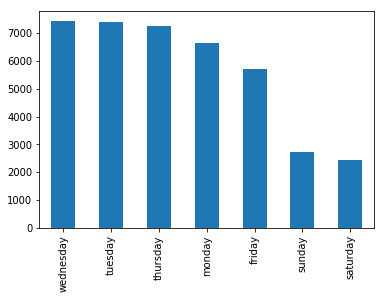

In [17]:
df3.Weekday.value_counts().sort_values(ascending=False).plot(kind="bar")

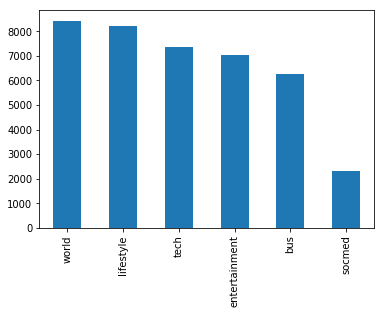

In [18]:
df3.data_channel.value_counts().sort_values(ascending=False).plot(kind="bar")

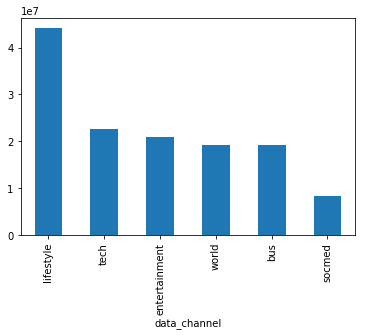

In [162]:
df3.groupby("data_channel")["shares"].sum().sort_values(ascending=False).plot(kind="bar")

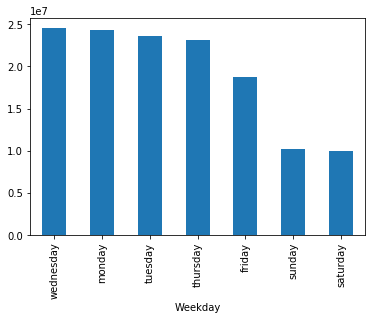

In [20]:
df3.groupby("Weekday")["shares"].sum().sort_values(ascending=False).plot(kind="bar")

In [21]:
bins = [0,1400,843300]
df3["Shares_Category"] = pd.cut(df3.shares,bins,labels=["Unpopular","Popular"])

In [22]:
df3.drop("shares",inplace=True,axis=1)

In [23]:
df3.data_channel = np.where(df3.data_channel.isin(["lifestyle"]),"lifestyle","others")

In [24]:
df3.Weekday = np.where(df3.Weekday.isin(["wednesday"]),"wednesday","others")

In [28]:
dummy_df3 = pd.get_dummies(df3.drop(["Shares_Category","url","timedelta"],axis=1))

In [29]:
X = dummy_df3
Y = df3.Shares_Category
XTRAIN,XTEST,YTRAIN,YTEST = train_test_split(X,Y,random_state=0,test_size=0.2)

In [30]:
ss = StandardScaler()

In [31]:
XTRAIN_SCALED=ss.fit_transform(XTRAIN)
XTEST_SCALED= ss.transform(XTEST)

C:\ana\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ana\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ana\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  


In [36]:
from lightgbm import LGBMClassifier,LGBMRegressor
from xgboost import XGBRegressor,XGBRFRegressor,XGBClassifier,XGBRFClassifier

In [37]:
XGBC = XGBClassifier(random_state=123)

In [38]:
XGBC_predict = XGBC.fit(XTRAIN_SCALED,YTRAIN).predict(XTEST_SCALED)

In [39]:
classificationreport = classification_report(YTEST,XGBC_predict)
print("Classification Report is:",classificationreport)

Classification Report is:               precision    recall  f1-score   support

     Popular       0.64      0.65      0.65      3874
   Unpopular       0.66      0.65      0.66      4055

   micro avg       0.65      0.65      0.65      7929
   macro avg       0.65      0.65      0.65      7929
weighted avg       0.65      0.65      0.65      7929



In [40]:
print(accuracy_score(YTEST,XGBC_predict))

0.6530457813091184


In [41]:
LGBM = LGBMClassifier(random_state=123)

In [42]:
LGBM_predict = LGBM.fit(XTRAIN_SCALED,YTRAIN).predict(XTEST_SCALED)

In [43]:
classificationreport = classification_report(YTEST,LGBM_predict)
print("Classification Report is:",classificationreport)

Classification Report is:               precision    recall  f1-score   support

     Popular       0.64      0.65      0.65      3874
   Unpopular       0.66      0.66      0.66      4055

   micro avg       0.65      0.65      0.65      7929
   macro avg       0.65      0.65      0.65      7929
weighted avg       0.65      0.65      0.65      7929



In [44]:
print(accuracy_score(YTEST,LGBM_predict))

0.6544330937066465


In [45]:
GBM = GradientBoostingClassifier(random_state=123)

In [46]:
GBM_predict = GBM.fit(XTRAIN_SCALED,YTRAIN).predict(XTEST_SCALED)

In [47]:
classificationreport = classification_report(YTEST,GBM_predict)
print("Classification Report is:",classificationreport)

Classification Report is:               precision    recall  f1-score   support

     Popular       0.64      0.66      0.65      3874
   Unpopular       0.66      0.65      0.66      4055

   micro avg       0.65      0.65      0.65      7929
   macro avg       0.65      0.65      0.65      7929
weighted avg       0.65      0.65      0.65      7929



In [48]:
print(accuracy_score(YTEST,GBM_predict))

0.6539286164711817


In [54]:
df3.drop(["url","timedelta"],axis=1,inplace=True)

In [55]:
mms = MinMaxScaler()

In [57]:
scaled_df = mms.fit_transform(dummy_df3)

C:\ana\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [163]:
pca = PCA(n_components=5)

In [164]:
pca_x = pca.fit_transform(scaled_df)

In [165]:
pca.explained_variance_

array([0.43377777, 0.30511964, 0.2218684 , 0.20748448, 0.19644853])

In [166]:
len(pca.explained_variance_ratio_)

5

In [167]:
len(X.columns)

48

In [168]:
print(np.round(pca.explained_variance_ratio_,4))

[0.1634 0.1149 0.0836 0.0782 0.074 ]


In [170]:
pca_evr_df = pd.DataFrame({"EVR in %":np.round(pca.explained_variance_ratio_,4)*100})
pca_evr_df.sort_values(by="EVR in %",ascending=False)

EVR in %
0     16.34
1     11.49
2      8.36
3      7.82
4      7.40

In [171]:
xtrain,xtest,ytrain,ytest = train_test_split(pca_x,Y,random_state=0,test_size=0.2)
print("xtrain shape: ",xtrain.shape)
print("xtest shape: ",xtest.shape)
print("ytrain shape: ",ytrain.shape)
print("ytest shape: ",ytest.shape)

xtrain shape:  (31715, 5)
xtest shape:  (7929, 5)
ytrain shape:  (31715,)
ytest shape:  (7929,)


In [172]:
logreg_pca = LogisticRegression(random_state=0)
predict_logreg_pca = logreg_pca.fit(xtrain,ytrain).predict(xtest)

C:\ana\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [173]:
classificationreport = classification_report(ytest,predict_logreg_pca)
print("Classification Report is:",classificationreport)

Classification Report is:               precision    recall  f1-score   support

     Popular       0.59      0.44      0.50      3874
   Unpopular       0.57      0.70      0.63      4055

   micro avg       0.57      0.57      0.57      7929
   macro avg       0.58      0.57      0.57      7929
weighted avg       0.58      0.57      0.57      7929



In [174]:
lgbm_pca = LGBMClassifier(random_state=123)

In [175]:
predict_lgbm_pca = lgbm_pca.fit(xtrain,ytrain).predict(xtest)

In [176]:
classificationreport = classification_report(ytest,predict_lgbm_pca)
print("Classification Report is:",classificationreport)

Classification Report is:               precision    recall  f1-score   support

     Popular       0.57      0.60      0.58      3874
   Unpopular       0.60      0.57      0.58      4055

   micro avg       0.58      0.58      0.58      7929
   macro avg       0.58      0.58      0.58      7929
weighted avg       0.58      0.58      0.58      7929



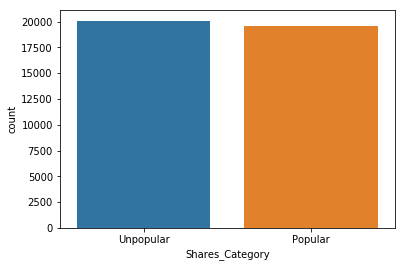

In [77]:
sns.countplot(df3.Shares_Category)

In [78]:
df3.Shares_Category.value_counts()

Unpopular    20082
Popular      19562
Name: Shares_Category, dtype: int64

In [146]:
print((df3.Shares_Category.value_counts()/df3.shape[0])*100,"%")

Unpopular    50.655837
Popular      49.344163
Name: Shares_Category, dtype: float64 %


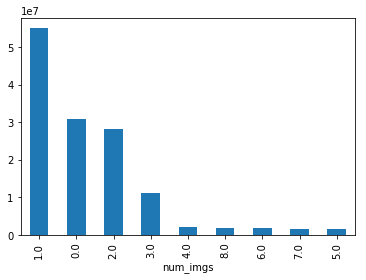

In [97]:
df.shares.groupby(round(df.num_imgs)).sum().sort_values(ascending=False).plot(kind="bar")

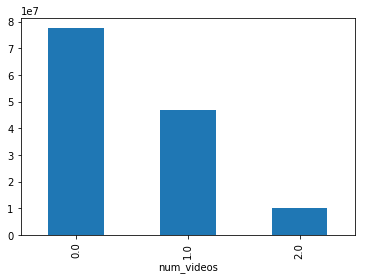

In [94]:
df.shares.groupby(round(df.num_videos)).sum().plot(kind="bar")

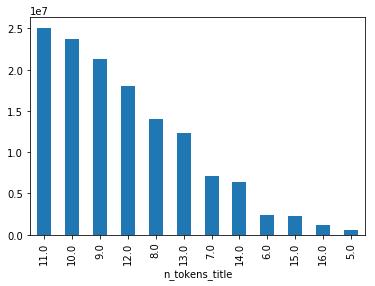

In [99]:
df.shares.groupby(round(df.n_tokens_title)).sum().sort_values(ascending=False).plot(kind="bar")

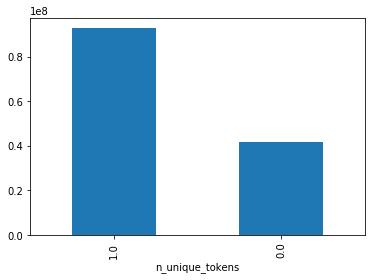

In [101]:
df.shares.groupby(round(df.n_unique_tokens)).sum().sort_values(ascending=False).plot(kind="bar")

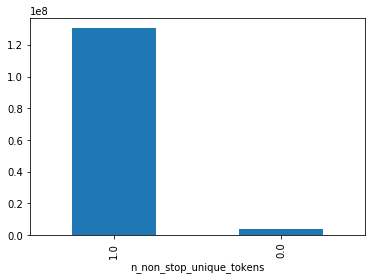

In [102]:
df.shares.groupby(round(df.n_non_stop_unique_tokens)).sum().sort_values(ascending=False).plot(kind="bar")

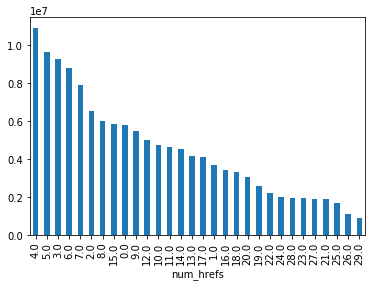

In [106]:
df.shares.groupby(round(df.num_hrefs)).sum().sort_values(ascending=False).plot(kind="bar")

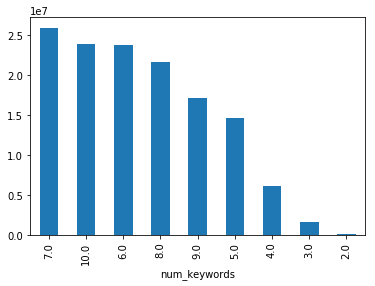

In [107]:
df.shares.groupby(round(df.num_keywords)).sum().sort_values(ascending=False).plot(kind="bar")

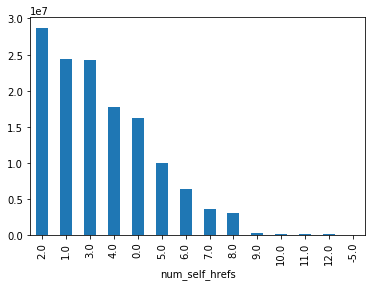

In [108]:
df.shares.groupby(round(df.num_self_hrefs)).sum().sort_values(ascending=False).plot(kind="bar")

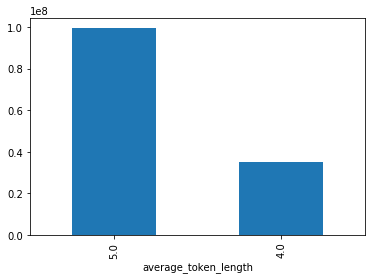

In [109]:
df.shares.groupby(round(df.average_token_length)).sum().sort_values(ascending=False).plot(kind="bar")

In [147]:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0}

In [ ]:
model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

In [153]:
model = LGBMClassifier(application='binary',objective= 'binary',metric='auc',is_unbalance='true',boosting='gbdt',num_leaves= 31,
                       feature_fraction= 0.5,bagging_fraction= 0.5,bagging_freq= 20,learning_rate= 0.05,verbose= 0,
                       num_boost_round=5000)

In [154]:
predict_model = model.fit(xtrain,ytrain).predict(xtest)

C:\ana\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [156]:
print(classification_report(ytest,predict_model))

              precision    recall  f1-score   support

     Popular       0.52      0.54      0.53      3874
   Unpopular       0.54      0.53      0.53      4055

   micro avg       0.53      0.53      0.53      7929
   macro avg       0.53      0.53      0.53      7929
weighted avg       0.53      0.53      0.53      7929

